# Capstone 3: Data Wrangling
<b>PROJECT GOAL</b><br>
The goal of this project is to understand and predict the valuation of publicly-traded companies as measured by market capitalization (the target or response variable).  Financial statement data will be used as predictor variables (features) to assess whether regression models of these fundamental variables can predicted future market capitalization.<br>

<b>DATA</b><br>
All data are sourced from Alpha Vantage via their API (https://www.alphavantage.co/documentation/).

<i>response variable (target)</i><br>
'mkt_cap' = [number of shares outstanding] x [share price]<br><br>
<i>predictor variables (features)</i><br>
Features will be metrics from financial statements such as revenue, revenue growth year-over-year, etc.  An initial set of metrics is defined in this notebook to be used as features in the regression models.

<b>DATA WRANGLING NOTEBOOK</b><br>
The purpose of this notebook is to:
<ol type="1">
  <li>Standardize the data with respect to data types, duplicates, null values, and nonlogical (negative, zero) values.</li>
  <li>abc</li>
  <li>abc</li>
</ol> 

## 1 Import Python Modules

In [1]:
import pandas as pd
import numpy as np
import datetime as dttm
import matplotlib.pyplot as plt

import json

## 2 Standardize Data

In this section, I define data types, remove duplicates, handle nulls, and handle nonlogical (negative, zero) values.  The data are active, U.S.-listed stocks as of Sep 30, 2021 that were captured in the prior notebook (011_Cap3_DataCapture.ipynb).

In [2]:
statusdate01 = dttm.date(2021,9,30)     #as of date

<b>2.1 BALANCE SHEET DATA</b>

In [3]:
#load from json
data_elmt021 = 'balsht'

filnm021 = '../data/sec_' + data_elmt021 + '_' + statusdate01.strftime('%Y%m%d') + '.json'
with open(filnm021) as f021:
    sec_res_dict021 = json.load(f021)

df_sec_balsht021 = pd.DataFrame.from_dict(sec_res_dict021)

del f021, sec_res_dict021

Define data types.

In [4]:
#data types: dates
df_sec_balsht021.loc[:,'fiscalDateEnding'] = pd.to_datetime(df_sec_balsht021.loc[:,'fiscalDateEnding'])
df_sec_balsht021.loc[:,'etl_timestamp'] = pd.to_datetime(df_sec_balsht021.loc[:,'etl_timestamp'])

In [5]:
#data types: numbers
lst_num021 = ['cashAndCashEquivalentsAtCarryingValue', 'cashAndShortTermInvestments', 
              'deferredRevenue', 'capitalLeaseObligations', 'longTermDebt', 'commonStockSharesOutstanding']

#convert None to zero, set to float
for lst_itm0211 in lst_num021:
    is_none_chk021 = df_sec_balsht021.loc[:,lst_itm0211] == 'None'
    df_sec_balsht021.loc[is_none_chk021,lst_itm0211] = 0
    df_sec_balsht021.loc[:,lst_itm0211] = df_sec_balsht021.loc[:,lst_itm0211].astype({lst_itm0211:'float64'})

Check for duplicates on key (Symbol,fiscalDateEnding) and remove duplicates if needed.

In [6]:
#duplicates on (Symbol,fiscalDateEnding)
lst_colkey021 =['Symbol','fiscalDateEnding']
is_dupe0211 = df_sec_balsht021.duplicated(subset=lst_colkey021, keep=False)
df_sec_balsht021.loc[is_dupe0211,:]

,Symbol,fiscalDateEnding,reportedCurrency,cashAndCashEquivalentsAtCarryingValue,cashAndShortTermInvestments,deferredRevenue,capitalLeaseObligations,longTermDebt,commonStockSharesOutstanding,etl_timestamp
29052,JOUT,2020-06-30,USD,181445000.0,181445000.0,5409000.0,38374000.0,0.0,10084799.0,2021-10-04 00:28:16
29053,JOUT,2020-06-30,USD,181445000.0,181445000.0,0.0,38374000.0,0.0,10074000.0,2021-10-04 00:28:16


In [7]:
#duplicates, remove if needed
is_dupe0212 = df_sec_balsht021.duplicated(subset=lst_colkey021, keep='first')
df_sec_balsht021 = df_sec_balsht021.loc[~is_dupe0212,:]
df_sec_balsht021.loc[is_dupe0211,:]

,Symbol,fiscalDateEnding,reportedCurrency,cashAndCashEquivalentsAtCarryingValue,cashAndShortTermInvestments,deferredRevenue,capitalLeaseObligations,longTermDebt,commonStockSharesOutstanding,etl_timestamp
29052,JOUT,2020-06-30,USD,181445000.0,181445000.0,5409000.0,38374000.0,0.0,10084799.0,2021-10-04 00:28:16


Sort, reset index.

In [8]:
#sort, reset index
df_sec_balsht021.sort_values(inplace=True,by=['Symbol','fiscalDateEnding'],ascending=[True,False])
df_sec_balsht021.reset_index(drop=True,inplace=True)
df_sec_balsht021

,Symbol,fiscalDateEnding,reportedCurrency,cashAndCashEquivalentsAtCarryingValue,cashAndShortTermInvestments,deferredRevenue,capitalLeaseObligations,longTermDebt,commonStockSharesOutstanding,etl_timestamp
0,A,2021-07-31,USD,1.428000e+09,1.428000e+09,958000000.0,0.0,2.728000e+09,303000000.0,2021-10-03 23:09:28
1,A,2021-04-30,USD,1.380000e+09,1.380000e+09,926000000.0,0.0,2.727000e+09,303000000.0,2021-10-03 23:09:28
2,A,2021-01-31,USD,1.329000e+09,1.329000e+09,904000000.0,0.0,2.185000e+09,305000000.0,2021-10-03 23:09:28
3,A,2020-10-31,USD,1.441000e+09,1.466000e+09,832000000.0,0.0,2.284000e+09,306000000.0,2021-10-03 23:09:28
4,A,2020-07-31,USD,1.358000e+09,1.358000e+09,848000000.0,0.0,2.283000e+09,309000000.0,2021-10-03 23:09:28
...,...,...,...,...,...,...,...,...,...,...
29929,ZYME,2019-12-31,USD,1.284510e+08,2.989040e+08,32973941.0,46000.0,0.000000e+00,39564529.0,2021-10-04 00:22:03
29930,ZYME,2019-09-30,USD,2.508440e+08,3.351030e+08,32941000.0,47000.0,0.000000e+00,39335992.0,2021-10-04 00:22:03
29931,ZYME,2019-06-30,USD,2.835200e+08,3.556500e+08,0.0,45000.0,0.000000e+00,39177669.0,2021-10-04 00:22:03
29932,ZYME,2019-03-31,USD,4.317400e+07,1.803080e+08,0.0,36000.0,6.410000e+06,32048479.0,2021-10-04 00:22:03


Certain metrics should not be negative.  Here, I check for negative values and set them to zero.  There are very few negative values.

In [9]:
#value check: non-negative
lst_num_nonneg021 = ['cashAndShortTermInvestments','cashAndCashEquivalentsAtCarryingValue','deferredRevenue',
    'capitalLeaseObligations','longTermDebt']
is_num_neg021 = (df_sec_balsht021.loc[:,lst_num_nonneg021] < 0).any(axis=1)
df_sec_balsht021.loc[is_num_neg021,:]

,Symbol,fiscalDateEnding,reportedCurrency,cashAndCashEquivalentsAtCarryingValue,cashAndShortTermInvestments,deferredRevenue,capitalLeaseObligations,longTermDebt,commonStockSharesOutstanding,etl_timestamp
2036,AR,2020-06-30,USD,-6.793000e+06,-6.793000e+06,0.0,6.970000e+05,5.420000e+05,268390000.0,2021-10-03 23:40:30
4418,BRKS,2021-06-30,USD,2.698620e+08,2.699630e+08,70821000.0,-1.000000e+04,4.965100e+07,74296729.0,2021-10-03 23:34:45
7826,DD,2021-03-31,USD,4.384000e+09,4.384000e+09,52000000.0,-1.995000e+09,1.262200e+10,604800000.0,2021-10-03 23:12:28
10300,FHB,2019-12-31,USD,6.940170e+08,6.940170e+08,1800000.0,-1.900000e+04,2.000190e+08,129928479.0,2021-10-03 23:51:28
28304,VOYA,2019-12-31,USD,1.181000e+09,2.644000e+09,0.0,-3.000000e+06,3.043000e+09,132325790.0,2021-10-03 23:36:30


In [10]:
#value check: non-negative, set to zero
is_col_num_neg021 = (df_sec_balsht021.loc[:,lst_num_nonneg021] < 0).any(axis=0)
col_num_neg021 = list(df_sec_balsht021.loc[:,lst_num_nonneg021].columns[is_col_num_neg021])

for col0211 in col_num_neg021:
    is_val_num_neg021 = df_sec_balsht021.loc[:,col0211] < 0
    df_sec_balsht021.loc[is_val_num_neg021,col0211] = 0

df_sec_balsht021.loc[is_num_neg021,:]

,Symbol,fiscalDateEnding,reportedCurrency,cashAndCashEquivalentsAtCarryingValue,cashAndShortTermInvestments,deferredRevenue,capitalLeaseObligations,longTermDebt,commonStockSharesOutstanding,etl_timestamp
2036,AR,2020-06-30,USD,0.000000e+00,0.000000e+00,0.0,697000.0,5.420000e+05,268390000.0,2021-10-03 23:40:30
4418,BRKS,2021-06-30,USD,2.698620e+08,2.699630e+08,70821000.0,0.0,4.965100e+07,74296729.0,2021-10-03 23:34:45
7826,DD,2021-03-31,USD,4.384000e+09,4.384000e+09,52000000.0,0.0,1.262200e+10,604800000.0,2021-10-03 23:12:28
10300,FHB,2019-12-31,USD,6.940170e+08,6.940170e+08,1800000.0,0.0,2.000190e+08,129928479.0,2021-10-03 23:51:28
28304,VOYA,2019-12-31,USD,1.181000e+09,2.644000e+09,0.0,0.0,3.043000e+09,132325790.0,2021-10-03 23:36:30


Certain metrics should be positive.  Here, the number of common equity shares outstanding should be positive, so I check for nonpositive values.  Any nonpositive values in period t are set equal to the median of the positive values in adjacent periods, period t-1 and period t+1, or nearest prior and post periods in time if the values in adjacent periods are nonpositive.

In [11]:
#value check: positive
lst_num_pos021 = ['commonStockSharesOutstanding']
is_num_nonpos021 = (df_sec_balsht021.loc[:,lst_num_pos021] <= 0).any(axis=1)
df_sec_balsht021.loc[is_num_nonpos021,:].sort_values(by=lst_num_pos021)

,Symbol,fiscalDateEnding,reportedCurrency,cashAndCashEquivalentsAtCarryingValue,cashAndShortTermInvestments,deferredRevenue,capitalLeaseObligations,longTermDebt,commonStockSharesOutstanding,etl_timestamp
26383,TMP,2019-12-31,USD,1.379820e+08,1.388970e+08,2.000000e+06,0.0,4.190000e+08,-4.484462e+10,2021-10-04 00:25:29
6611,COP,2020-12-31,USD,2.991000e+09,6.600000e+09,1.940000e+08,0.0,1.910600e+10,-3.234263e+09,2021-10-03 23:05:26
20458,PCAR,2018-12-31,USD,3.435900e+09,3.435900e+09,6.999000e+08,0.0,1.887000e+08,-1.054799e+09,2021-10-03 23:15:46
23575,SCU,2018-12-31,USD,3.158090e+08,3.158090e+08,6.234900e+07,0.0,2.899870e+08,-5.003721e+08,2021-10-04 00:16:43
16713,MCFE,2020-12-31,USD,2.310000e+08,2.310000e+08,2.399000e+09,25000000.0,4.038000e+09,-4.860000e+08,2021-10-03 23:30:40
...,...,...,...,...,...,...,...,...,...,...
8867,EDR,2019-06-30,USD,8.309360e+08,8.309360e+08,0.000000e+00,0.0,4.491586e+09,0.000000e+00,2021-10-03 23:34:53
8866,EDR,2019-09-30,USD,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,2021-10-03 23:34:53
8865,EDR,2019-12-31,USD,7.053480e+08,7.053480e+08,0.000000e+00,0.0,4.929889e+09,0.000000e+00,2021-10-03 23:34:53
7868,DDS,2018-11-03,USD,7.815600e+07,7.815600e+07,0.000000e+00,1980000.0,3.655000e+08,0.000000e+00,2021-10-03 23:53:24


In [12]:
#value check: positive, set to median of positive neighbors
col_shout0212 = 'commonStockSharesOutstanding'
col_fd0212 = 'fiscalDateEnding'
for idx0212, rcd0212 in df_sec_balsht021.loc[is_num_nonpos021,:].iloc[:,:].iterrows():
    tickn0212 = rcd0212[0]
    fdn0212 = rcd0212[1]

    is_upset0212 = ( (df_sec_balsht021.loc[:,'Symbol'] == tickn0212) & 
        (df_sec_balsht021.loc[:,col_shout0212] > 0) &              
        (df_sec_balsht021.loc[:,col_fd0212] > fdn0212) )
    is_dwnset0212 = ( (df_sec_balsht021.loc[:,'Symbol'] == tickn0212) & 
        (df_sec_balsht021.loc[:,col_shout0212] > 0) &              
        (df_sec_balsht021.loc[:,col_fd0212] < fdn0212) )
    is_nghbrset0212 = ( (df_sec_balsht021.index == df_sec_balsht021.loc[is_upset0212,:].index.max()) | 
        (df_sec_balsht021.index == df_sec_balsht021.loc[is_dwnset0212,:].index.min()) )
    shout_nghbr_med0212 = df_sec_balsht021.loc[is_nghbrset0212,col_shout0212].median() 

    df_sec_balsht021.loc[idx0212,col_shout0212] = shout_nghbr_med0212

#any remaining nonpositive, set to NaN
lst_num_pos021 = ['commonStockSharesOutstanding']
is_num_nonpos021 = (df_sec_balsht021.loc[:,lst_num_pos021] <= 0).any(axis=1)
df_sec_balsht021.loc[is_num_nonpos021,:] = np.NaN

Most nonpositive values are updated to the median of values from neighboring periods.

In [13]:
#value check: positive
lst_num_pos021 = ['commonStockSharesOutstanding']
is_num_nonpos021 = (df_sec_balsht021.loc[:,lst_num_pos021] <= 0).any(axis=1)
df_sec_balsht021.loc[is_num_nonpos021,:].sort_values(by=lst_num_pos021)

,Symbol,fiscalDateEnding,reportedCurrency,cashAndCashEquivalentsAtCarryingValue,cashAndShortTermInvestments,deferredRevenue,capitalLeaseObligations,longTermDebt,commonStockSharesOutstanding,etl_timestamp


A relative handful of records have missing data and are NaN.

In [14]:
#value check: NaN
lst_num_pos021 = ['commonStockSharesOutstanding']
is_num_nan021 = df_sec_balsht021.loc[:,lst_num_pos021].isin([np.NaN]).any(axis=1)
df_sec_balsht021.loc[is_num_nan021,:].sort_values(by=lst_num_pos021)

,Symbol,fiscalDateEnding,reportedCurrency,cashAndCashEquivalentsAtCarryingValue,cashAndShortTermInvestments,deferredRevenue,capitalLeaseObligations,longTermDebt,commonStockSharesOutstanding,etl_timestamp
446,ACT,2021-06-30,USD,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,NaN,2021-10-03 23:54:06
447,ACT,2021-03-31,USD,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,NaN,2021-10-03 23:54:06
448,ACT,2020-12-31,USD,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,NaN,2021-10-03 23:54:06
449,ACT,2020-09-30,USD,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,NaN,2021-10-03 23:54:06
450,ACT,2020-06-30,USD,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,NaN,2021-10-03 23:54:06
451,ACT,2020-03-31,USD,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,NaN,2021-10-03 23:54:06
8227,DNA,2021-06-30,USD,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,NaN,2021-10-03 23:18:13
8228,DNA,2021-03-31,USD,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,NaN,2021-10-03 23:18:13
8229,DNA,2020-03-31,USD,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,NaN,2021-10-03 23:18:13
12777,HLTH,2021-06-30,USD,2.463260e+08,2.463260e+08,0.0,52487000.0,2.587340e+08,NaN,2021-10-04 00:18:26


Below shows some example stock tickers that had shares outstanding that were nonpositive and then updated to have values equal to the median value of records from neighboring periods for the same ticker.

In [15]:
#after
is_symb_chk021 = df_sec_balsht021.loc[:,'Symbol'].isin(['ABCM','COP','MCFE','SKIL'])
df_sec_balsht021.loc[is_symb_chk021,['Symbol','fiscalDateEnding',col_shout0212]].head(44)

,Symbol,fiscalDateEnding,commonStockSharesOutstanding
155,ABCM,2021-06-30,2.267526e+08
156,ABCM,2021-03-31,2.267091e+08
157,ABCM,2020-12-31,2.266657e+08
158,ABCM,2020-09-30,2.096000e+08
159,ABCM,2020-06-30,2.096000e+08
160,ABCM,2020-03-31,2.096000e+08
161,ABCM,2019-12-31,2.096000e+08
162,ABCM,2019-09-30,2.081500e+08
163,ABCM,2019-06-30,2.067000e+08
164,ABCM,2019-03-31,2.067000e+08


Below shows a summary of the data after standardization.

In [16]:
df_sec_balsht021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29934 entries, 0 to 29933
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Symbol                                 29934 non-null  object        
 1   fiscalDateEnding                       29934 non-null  datetime64[ns]
 2   reportedCurrency                       29934 non-null  object        
 3   cashAndCashEquivalentsAtCarryingValue  29934 non-null  float64       
 4   cashAndShortTermInvestments            29934 non-null  float64       
 5   deferredRevenue                        29934 non-null  float64       
 6   capitalLeaseObligations                29934 non-null  float64       
 7   longTermDebt                           29934 non-null  float64       
 8   commonStockSharesOutstanding           29893 non-null  float64       
 9   etl_timestamp                          29934 non-null  dateti

In [17]:
df_sec_balsht021.describe()

,cashAndCashEquivalentsAtCarryingValue,cashAndShortTermInvestments,deferredRevenue,capitalLeaseObligations,longTermDebt,commonStockSharesOutstanding
count,2.993400e+04,2.993400e+04,2.993400e+04,2.993400e+04,2.993400e+04,2.989300e+04
mean,1.348942e+11,1.355254e+11,2.794659e+08,7.121655e+09,1.073679e+14,9.325009e+09
std,2.407231e+12,2.407215e+12,2.297257e+09,2.098827e+11,1.008192e+16,1.237509e+12
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.100000e+03
25%,8.697775e+07,9.830975e+07,0.000000e+00,0.000000e+00,6.898000e+07,5.160200e+07
50%,2.831275e+08,3.296880e+08,0.000000e+00,6.491000e+06,8.449690e+08,1.119682e+08
75%,9.619592e+08,1.142921e+09,3.504175e+07,9.300000e+07,3.673825e+09,2.798911e+08
max,1.033242e+14,1.033242e+14,8.828200e+10,1.487700e+13,1.000000e+18,2.099653e+14


<b>2.2 INCOME STATEMENT DATA</b>

The steps are the same as in the prior section: define data types, handle duplicates, sort and reset index, and handle nonlogical values.

In [18]:
#load from json
data_elmt022 = 'incstmt'

filnm022 = '../data/sec_' + data_elmt022 + '_' + statusdate01.strftime('%Y%m%d') + '.json'
with open(filnm022) as f022:
    sec_res_dict022 = json.load(f022)

df_sec_incstmt022 = pd.DataFrame.from_dict(sec_res_dict022)

del f022, sec_res_dict022

In [19]:
#data types: dates
df_sec_incstmt022.loc[:,'fiscalDateEnding'] = pd.to_datetime(df_sec_incstmt022.loc[:,'fiscalDateEnding'])
df_sec_incstmt022.loc[:,'etl_timestamp'] = pd.to_datetime(df_sec_incstmt022.loc[:,'etl_timestamp'])

In [20]:
#data types: numbers
lst_num022 = ['totalRevenue','costofGoodsAndServicesSold','costOfRevenue','grossProfit',
    'operatingExpenses','operatingIncome','incomeBeforeTax',
    'depreciationAndAmortization','ebitda','netIncome']

#convert None to zero, set to float
for lst_itm0221 in lst_num022:
    is_none_chk022 = df_sec_incstmt022.loc[:,lst_itm0221] == 'None'
    df_sec_incstmt022.loc[is_none_chk022,lst_itm0221] = 0
    df_sec_incstmt022.loc[:,lst_itm0221] = df_sec_incstmt022.loc[:,lst_itm0221].astype({lst_itm0221:'float64'})

In [21]:
#duplicates on (Symbol,fiscalDateEnding)
lst_colkey022 =['Symbol','fiscalDateEnding']
is_dupe0221 = df_sec_incstmt022.duplicated(subset=lst_colkey022, keep=False)
df_sec_incstmt022.loc[is_dupe0221,:]

,Symbol,fiscalDateEnding,reportedCurrency,totalRevenue,costofGoodsAndServicesSold,costOfRevenue,grossProfit,operatingExpenses,operatingIncome,incomeBeforeTax,depreciationAndAmortization,ebitda,netIncome,etl_timestamp
12010,ITT,2020-06-30,USD,5.147000e+08,351100000.0,3.511000e+08,163600000.0,131300000.0,20500000.0,19900000.0,4200000.0,24700000.0,48000000.0,2021-10-04 08:27:20
12011,ITT,2020-06-30,USD,5.147000e+08,351100000.0,3.511000e+08,163600000.0,115200000.0,20500000.0,19900000.0,27100000.0,47000000.0,48000000.0,2021-10-04 08:27:20
16907,SPB,2020-06-30,USD,9.843000e+08,635700000.0,6.357000e+08,348900000.0,177800000.0,170800000.0,198700000.0,35100000.0,221600000.0,145100000.0,2021-10-04 08:42:32
16908,SPB,2020-06-30,USD,1.028900e+09,635700000.0,4.920000e+07,348900000.0,254300000.0,94600000.0,198700000.0,20600000.0,221600000.0,145100000.0,2021-10-04 08:42:32
18288,REZI,2020-06-30,USD,1.011000e+09,793000000.0,1.067000e+09,236000000.0,274000000.0,-6000000.0,-53000000.0,21000000.0,-14000000.0,-76000000.0,2021-10-04 08:46:36
18289,REZI,2020-06-30,USD,1.029000e+09,793000000.0,7.930000e+08,236000000.0,242000000.0,-6000000.0,-53000000.0,21000000.0,-14000000.0,-76000000.0,2021-10-04 08:46:36
20405,JJSF,2020-06-30,USD,2.145630e+08,177367000.0,1.773670e+08,37196000.0,56616000.0,-19420000.0,-18127000.0,13382000.0,-17205000.0,-12647000.0,2021-10-04 08:53:16
20406,JJSF,2020-06-30,USD,2.145560e+08,177367000.0,2.168980e+08,37196000.0,56616000.0,-19420000.0,-18127000.0,915000.0,-17205000.0,-12647000.0,2021-10-04 08:53:16
22990,UTZ,2020-06-30,USD,4.700060e+08,305111000.0,5.563360e+05,-556336.0,556336.0,-14001570.0,-383906.0,0.0,-728766.0,-1898112.0,2021-10-04 09:01:49
22991,UTZ,2020-06-30,USD,2.419770e+08,157096000.0,3.051110e+08,84881000.0,556336.0,17451000.0,7752000.0,1900000.0,19639000.0,6552000.0,2021-10-04 09:01:49


In [22]:
#duplicates, remove if needed
is_dupe0222 = df_sec_incstmt022.duplicated(subset=lst_colkey022, keep='first')
df_sec_incstmt022 = df_sec_incstmt022.loc[~is_dupe0222,:]
df_sec_incstmt022.loc[is_dupe0221,:]

,Symbol,fiscalDateEnding,reportedCurrency,totalRevenue,costofGoodsAndServicesSold,costOfRevenue,grossProfit,operatingExpenses,operatingIncome,incomeBeforeTax,depreciationAndAmortization,ebitda,netIncome,etl_timestamp
12010,ITT,2020-06-30,USD,5.147000e+08,351100000.0,3.511000e+08,163600000.0,131300000.0,20500000.0,19900000.0,4200000.0,24700000.0,48000000.0,2021-10-04 08:27:20
16907,SPB,2020-06-30,USD,9.843000e+08,635700000.0,6.357000e+08,348900000.0,177800000.0,170800000.0,198700000.0,35100000.0,221600000.0,145100000.0,2021-10-04 08:42:32
18288,REZI,2020-06-30,USD,1.011000e+09,793000000.0,1.067000e+09,236000000.0,274000000.0,-6000000.0,-53000000.0,21000000.0,-14000000.0,-76000000.0,2021-10-04 08:46:36
20405,JJSF,2020-06-30,USD,2.145630e+08,177367000.0,1.773670e+08,37196000.0,56616000.0,-19420000.0,-18127000.0,13382000.0,-17205000.0,-12647000.0,2021-10-04 08:53:16
22990,UTZ,2020-06-30,USD,4.700060e+08,305111000.0,5.563360e+05,-556336.0,556336.0,-14001570.0,-383906.0,0.0,-728766.0,-1898112.0,2021-10-04 09:01:49
29682,JOUT,2020-06-30,USD,1.383550e+08,75828000.0,1.185580e+08,62562000.0,49633000.0,12929000.0,15557000.0,1676000.0,17268000.0,12869000.0,2021-10-04 09:24:41


In [23]:
#sort, reset index
df_sec_incstmt022.sort_values(inplace=True,by=['Symbol','fiscalDateEnding'],ascending=[True,False])
df_sec_incstmt022.reset_index(drop=True,inplace=True)
df_sec_incstmt022

,Symbol,fiscalDateEnding,reportedCurrency,totalRevenue,costofGoodsAndServicesSold,costOfRevenue,grossProfit,operatingExpenses,operatingIncome,incomeBeforeTax,depreciationAndAmortization,ebitda,netIncome,etl_timestamp
0,A,2021-07-31,USD,1.565000e+09,734000000.0,1.201000e+09,364000000.0,580000000.0,336000000.0,327000000.0,54000000.0,402000000.0,264000000.0,2021-10-04 07:59:56
1,A,2021-04-30,USD,1.505000e+09,708000000.0,1.191000e+09,314000000.0,592000000.0,288000000.0,273000000.0,45000000.0,338000000.0,216000000.0,2021-10-04 07:59:56
2,A,2021-01-31,USD,1.524000e+09,710000000.0,1.171000e+09,353000000.0,564000000.0,328000000.0,312000000.0,45000000.0,376000000.0,288000000.0,2021-10-04 07:59:56
3,A,2020-10-31,USD,1.463000e+09,695000000.0,1.144000e+09,319000000.0,551000000.0,299000000.0,283000000.0,46000000.0,348000000.0,222000000.0,2021-10-04 07:59:56
4,A,2020-07-31,USD,1.246000e+09,592000000.0,9.930000e+08,253000000.0,493000000.0,230000000.0,219000000.0,45000000.0,283000000.0,199000000.0,2021-10-04 07:59:56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30582,ZYME,2019-12-31,USD,1.877000e+06,45389000.0,3.119700e+07,1877000.0,75629000.0,-73752000.0,-72746000.0,957000.0,-72795000.0,-72244000.0,2021-10-04 09:17:50
30583,ZYME,2019-09-30,USD,7.944000e+06,29251000.0,1.217300e+07,-4229000.0,41424000.0,-33564000.0,-31383000.0,854000.0,-30496000.0,-30475000.0,2021-10-04 09:17:50
30584,ZYME,2019-06-30,USD,7.639000e+06,23785000.0,1.352900e+07,-5890000.0,37314000.0,-29432000.0,-28442000.0,649000.0,-27728000.0,-29077000.0,2021-10-04 09:17:50
30585,ZYME,2019-03-31,USD,1.176800e+07,17475000.0,9.656000e+06,2112000.0,26478000.0,-14553000.0,-13448000.0,653000.0,-12777000.0,-13641000.0,2021-10-04 09:17:50


In [24]:
#value check: non-negative
lst_num_nonneg022 = ['totalRevenue','costofGoodsAndServicesSold','costOfRevenue','operatingExpenses']
is_num_neg022 = (df_sec_incstmt022.loc[:,lst_num_nonneg022] < 0).any(axis=1)
df_sec_incstmt022.loc[is_num_neg022,:]

,Symbol,fiscalDateEnding,reportedCurrency,totalRevenue,costofGoodsAndServicesSold,costOfRevenue,grossProfit,operatingExpenses,operatingIncome,incomeBeforeTax,depreciationAndAmortization,ebitda,netIncome,etl_timestamp
12,AA,2021-06-30,USD,2.854000e+09,2.156000e+09,2.210000e+09,6.440000e+08,-38000000.0,5.840000e+08,4.200000e+08,161000000.0,6.480000e+08,3.090000e+08,2021-10-04 08:22:55
14,AA,2020-12-31,USD,2.392000e+09,1.974000e+09,1.582000e+09,2.392000e+09,-382000000.0,2.392000e+09,1.600000e+07,-474000000.0,-4.150000e+08,-4.000000e+06,2021-10-04 08:22:55
25,AAC,2020-06-30,USD,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-98553.0,9.855300e+04,9.855300e+04,0.0,9.855300e+04,9.855300e+04,2021-10-04 09:21:19
130,ABC,2020-09-30,USD,4.924477e+10,4.789792e+10,4.789792e+10,1.346847e+09,-500000.0,-6.113137e+09,-6.145024e+09,97362000.0,-6.015775e+09,-4.846072e+09,2021-10-04 08:07:56
134,ABC,2019-09-30,USD,4.563780e+10,4.445306e+10,4.445306e+10,1.184737e+09,-3100000.0,1.798410e+08,1.449630e+08,108545000.0,2.883860e+08,1.326190e+08,2021-10-04 08:07:56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30453,ZION,2019-09-30,USD,1.400000e+08,-6.900000e+07,4.230000e+08,2.830000e+08,50000000.0,2.330000e+08,2.880000e+08,50000000.0,4.480000e+08,2.220000e+08,2021-10-04 08:20:56
30454,ZION,2019-06-30,USD,6.830000e+08,-6.600000e+07,4.440000e+08,2.390000e+08,50000000.0,1.890000e+08,2.560000e+08,49000000.0,4.200000e+08,1.980000e+08,2021-10-04 08:20:56
30455,ZION,2019-03-31,USD,7.120000e+08,-5.700000e+07,4.340000e+08,2.780000e+08,93000000.0,1.850000e+08,2.740000e+08,44000000.0,4.170000e+08,2.130000e+08,2021-10-04 08:20:56
30469,ZLAB,2018-12-31,USD,1.989780e+06,4.359000e+04,-1.055625e+07,1.018581e+07,66644886.0,-6.654354e+07,-6.312501e+07,499234.0,-6.604439e+07,-6.335740e+07,2021-10-04 08:20:59


In [25]:
#value check: non-negative, set to NaN
is_col_num_neg022 = (df_sec_incstmt022.loc[:,lst_num_nonneg022] < 0).any(axis=0)
col_num_neg022 = list(df_sec_incstmt022.loc[:,lst_num_nonneg022].columns[is_col_num_neg022])

for col0221 in col_num_neg022:
    is_val_num_neg022 = df_sec_incstmt022.loc[:,col0221] < 0
    df_sec_incstmt022.loc[is_val_num_neg022,col0221] = np.NaN

df_sec_incstmt022.loc[is_num_neg022,:]

,Symbol,fiscalDateEnding,reportedCurrency,totalRevenue,costofGoodsAndServicesSold,costOfRevenue,grossProfit,operatingExpenses,operatingIncome,incomeBeforeTax,depreciationAndAmortization,ebitda,netIncome,etl_timestamp
12,AA,2021-06-30,USD,2.854000e+09,2.156000e+09,2.210000e+09,6.440000e+08,NaN,5.840000e+08,4.200000e+08,161000000.0,6.480000e+08,3.090000e+08,2021-10-04 08:22:55
14,AA,2020-12-31,USD,2.392000e+09,1.974000e+09,1.582000e+09,2.392000e+09,NaN,2.392000e+09,1.600000e+07,-474000000.0,-4.150000e+08,-4.000000e+06,2021-10-04 08:22:55
25,AAC,2020-06-30,USD,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,9.855300e+04,9.855300e+04,0.0,9.855300e+04,9.855300e+04,2021-10-04 09:21:19
130,ABC,2020-09-30,USD,4.924477e+10,4.789792e+10,4.789792e+10,1.346847e+09,NaN,-6.113137e+09,-6.145024e+09,97362000.0,-6.015775e+09,-4.846072e+09,2021-10-04 08:07:56
134,ABC,2019-09-30,USD,4.563780e+10,4.445306e+10,4.445306e+10,1.184737e+09,NaN,1.798410e+08,1.449630e+08,108545000.0,2.883860e+08,1.326190e+08,2021-10-04 08:07:56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30453,ZION,2019-09-30,USD,1.400000e+08,NaN,4.230000e+08,2.830000e+08,50000000.0,2.330000e+08,2.880000e+08,50000000.0,4.480000e+08,2.220000e+08,2021-10-04 08:20:56
30454,ZION,2019-06-30,USD,6.830000e+08,NaN,4.440000e+08,2.390000e+08,50000000.0,1.890000e+08,2.560000e+08,49000000.0,4.200000e+08,1.980000e+08,2021-10-04 08:20:56
30455,ZION,2019-03-31,USD,7.120000e+08,NaN,4.340000e+08,2.780000e+08,93000000.0,1.850000e+08,2.740000e+08,44000000.0,4.170000e+08,2.130000e+08,2021-10-04 08:20:56
30469,ZLAB,2018-12-31,USD,1.989780e+06,4.359000e+04,NaN,1.018581e+07,66644886.0,-6.654354e+07,-6.312501e+07,499234.0,-6.604439e+07,-6.335740e+07,2021-10-04 08:20:59


In [26]:
df_sec_incstmt022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30587 entries, 0 to 30586
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Symbol                       30587 non-null  object        
 1   fiscalDateEnding             30587 non-null  datetime64[ns]
 2   reportedCurrency             30587 non-null  object        
 3   totalRevenue                 30507 non-null  float64       
 4   costofGoodsAndServicesSold   30363 non-null  float64       
 5   costOfRevenue                30355 non-null  float64       
 6   grossProfit                  30587 non-null  float64       
 7   operatingExpenses            30158 non-null  float64       
 8   operatingIncome              30587 non-null  float64       
 9   incomeBeforeTax              30587 non-null  float64       
 10  depreciationAndAmortization  30587 non-null  float64       
 11  ebitda                       30587 non-nu

In [27]:
df_sec_incstmt022.describe()

,totalRevenue,costofGoodsAndServicesSold,costOfRevenue,grossProfit,operatingExpenses,operatingIncome,incomeBeforeTax,depreciationAndAmortization,ebitda,netIncome
count,3.050700e+04,3.036300e+04,3.035500e+04,3.058700e+04,3.015800e+04,3.058700e+04,3.058700e+04,3.058700e+04,3.058700e+04,3.058700e+04
mean,5.641671e+10,6.589910e+13,6.591669e+13,1.853387e+10,1.337556e+10,7.831623e+09,8.577325e+09,2.740501e+09,1.044805e+10,5.164264e+09
std,9.083024e+11,8.115878e+15,8.116947e+15,4.329966e+11,3.090822e+11,2.274994e+11,2.136575e+11,8.191130e+10,2.556942e+11,1.200727e+11
min,0.000000e+00,0.000000e+00,0.000000e+00,-2.115755e+12,0.000000e+00,-1.615542e+12,-2.172977e+12,-5.469140e+11,-1.454826e+12,-1.801041e+12
25%,1.218080e+08,1.502400e+07,4.480750e+07,3.392250e+07,3.784325e+07,-4.863000e+06,-6.211500e+06,8.461805e+05,0.000000e+00,-6.318000e+06
50%,4.472810e+08,1.526060e+08,2.174883e+08,1.476000e+08,1.207105e+08,3.575300e+07,3.300000e+07,8.790000e+06,5.452700e+07,2.692300e+07
75%,1.705634e+09,7.019260e+08,8.914745e+08,5.588330e+08,3.920000e+08,1.839720e+08,1.665810e+08,4.715450e+07,2.289995e+08,1.372500e+08
max,3.650600e+13,1.000000e+18,1.000000e+18,2.286300e+13,2.227000e+13,1.202900e+13,1.132900e+13,7.412000e+12,1.898800e+13,6.437000e+12


<b>2.3 CASH FLOW DATA</b>

The steps are the same as in the prior sections: define data types, handle duplicates, sort and reset index, and handle nonlogical values.

In [28]:
#load from json
data_elmt023 = 'cshflw'

filnm023 = '../data/sec_' + data_elmt023 + '_' + statusdate01.strftime('%Y%m%d') + '.json'
with open(filnm023) as f023:
    sec_res_dict023 = json.load(f023)

df_sec_cshflw023 = pd.DataFrame.from_dict(sec_res_dict023)

del f023, sec_res_dict023

In [29]:
#data types: dates
df_sec_cshflw023.loc[:,'fiscalDateEnding'] = pd.to_datetime(df_sec_cshflw023.loc[:,'fiscalDateEnding'])
df_sec_cshflw023.loc[:,'etl_timestamp'] = pd.to_datetime(df_sec_cshflw023.loc[:,'etl_timestamp'])

In [30]:
#data types: numbers
lst_num023 = ['proceedsFromIssuanceOfCommonStock','paymentsForRepurchaseOfCommonStock','capitalExpenditures',
    'dividendPayoutCommonStock',
    'operatingCashflow','cashflowFromInvestment','cashflowFromFinancing','changeInCashAndCashEquivalents']

#convert None to zero, set to float
for lst_itm0231 in lst_num023:
    is_none_chk023 = df_sec_cshflw023.loc[:,lst_itm0231] == 'None'
    df_sec_cshflw023.loc[is_none_chk023,lst_itm0231] = 0
    df_sec_cshflw023.loc[:,lst_itm0231] = df_sec_cshflw023.loc[:,lst_itm0231].astype({lst_itm0231:'float64'})

In [31]:
#duplicates on (Symbol,fiscalDateEnding)
lst_colkey023 =['Symbol','fiscalDateEnding']
is_dupe0231 = df_sec_cshflw023.duplicated(subset=lst_colkey023, keep=False)
df_sec_cshflw023.loc[is_dupe0231,:]

,Symbol,fiscalDateEnding,reportedCurrency,proceedsFromIssuanceOfCommonStock,paymentsForRepurchaseOfCommonStock,capitalExpenditures,dividendPayoutCommonStock,operatingCashflow,cashflowFromInvestment,cashflowFromFinancing,changeInCashAndCashEquivalents,etl_timestamp
11916,ITT,2020-06-30,USD,0.0,300000.0,12100000.0,14400000.0,68700000.0,-10900000.0,-170800000.0,68700000.0,2021-10-04 10:01:05
11917,ITT,2020-06-30,USD,0.0,300000.0,12100000.0,14400000.0,149600000.0,-10900000.0,-170800000.0,-20600000.0,2021-10-04 10:01:05


In [32]:
#duplicates, remove if needed
is_dupe0232 = df_sec_cshflw023.duplicated(subset=lst_colkey022, keep='last')
df_sec_cshflw023 = df_sec_cshflw023.loc[~is_dupe0232,:]
df_sec_cshflw023.loc[is_dupe0231,:]

,Symbol,fiscalDateEnding,reportedCurrency,proceedsFromIssuanceOfCommonStock,paymentsForRepurchaseOfCommonStock,capitalExpenditures,dividendPayoutCommonStock,operatingCashflow,cashflowFromInvestment,cashflowFromFinancing,changeInCashAndCashEquivalents,etl_timestamp
11917,ITT,2020-06-30,USD,0.0,300000.0,12100000.0,14400000.0,149600000.0,-10900000.0,-170800000.0,-20600000.0,2021-10-04 10:01:05


In [33]:
#sort, reset index
df_sec_cshflw023.sort_values(inplace=True,by=['Symbol','fiscalDateEnding'],ascending=[True,False])
df_sec_cshflw023.reset_index(drop=True,inplace=True)
df_sec_cshflw023

,Symbol,fiscalDateEnding,reportedCurrency,proceedsFromIssuanceOfCommonStock,paymentsForRepurchaseOfCommonStock,capitalExpenditures,dividendPayoutCommonStock,operatingCashflow,cashflowFromInvestment,cashflowFromFinancing,changeInCashAndCashEquivalents,etl_timestamp
0,A,2021-07-31,USD,0.0,113000000.0,55000000.0,59000000.0,334000000.0,-61000000.0,-222000000.0,258000000.0,2021-10-04 09:41:20
1,A,2021-04-30,USD,0.0,195000000.0,31000000.0,59000000.0,472000000.0,-587000000.0,166000000.0,203000000.0,2021-10-04 09:41:20
2,A,2021-01-31,USD,0.0,344000000.0,41000000.0,59000000.0,238000000.0,-42000000.0,-316000000.0,-111000000.0,2021-10-04 09:41:20
3,A,2020-10-31,USD,0.0,250000000.0,27000000.0,55000000.0,377000000.0,-27000000.0,-269000000.0,83000000.0,2021-10-04 09:41:20
4,A,2020-07-31,USD,0.0,33000000.0,25000000.0,56000000.0,290000000.0,-32000000.0,-231000000.0,188000000.0,2021-10-04 09:41:20
...,...,...,...,...,...,...,...,...,...,...,...,...
30254,ZYME,2019-12-31,USD,0.0,0.0,2197000.0,0.0,-36354000.0,-88197000.0,2158000.0,-73752000.0,2021-10-04 10:39:35
30255,ZYME,2019-09-30,USD,0.0,0.0,10274000.0,0.0,-10880000.0,-22774000.0,999000.0,-30475000.0,2021-10-04 10:39:35
30256,ZYME,2019-06-30,USD,0.0,0.0,1376000.0,0.0,-13317000.0,63374000.0,189935000.0,-29077000.0,2021-10-04 10:39:35
30257,ZYME,2019-03-31,USD,0.0,0.0,31000.0,0.0,-21302000.0,22005000.0,569000.0,1272000.0,2021-10-04 10:39:35


In [34]:
#value check: non-negative
lst_num_nonneg023 = ['proceedsFromIssuanceOfCommonStock','paymentsForRepurchaseOfCommonStock','capitalExpenditures',
    'dividendPayoutCommonStock']
is_num_neg023 = (df_sec_cshflw023.loc[:,lst_num_nonneg023] < 0).any(axis=1)
df_sec_cshflw023.loc[is_num_neg023,:]

,Symbol,fiscalDateEnding,reportedCurrency,proceedsFromIssuanceOfCommonStock,paymentsForRepurchaseOfCommonStock,capitalExpenditures,dividendPayoutCommonStock,operatingCashflow,cashflowFromInvestment,cashflowFromFinancing,changeInCashAndCashEquivalents,etl_timestamp
27,AAL,2021-06-30,USD,0.0,0.0,-99000000.0,0.0,3.470000e+09,-3.884000e+09,4.450000e+08,19000000.0,2021-10-04 09:52:55
28,AAL,2021-03-31,USD,0.0,13000000.0,-19000000.0,0.0,1.740000e+08,-7.152000e+09,7.013000e+09,35000000.0,2021-10-04 09:52:55
76,AAT,2020-03-31,USD,-119000.0,0.0,20531000.0,22937000.0,4.536100e+07,-2.392500e+07,-7.405900e+07,-52623000.0,2021-10-04 10:26:00
179,ABG,2020-12-31,USD,0.0,-100000.0,0.0,0.0,2.730000e+07,-2.700000e+06,-2.730000e+07,-2700000.0,2021-10-04 10:14:15
209,ABMD,2019-03-31,USD,0.0,0.0,-21901000.0,0.0,7.039100e+07,-3.575400e+07,3.019000e+06,36840000.0,2021-10-04 09:52:34
...,...,...,...,...,...,...,...,...,...,...,...,...
29754,XLRN,2019-06-30,USD,-25000.0,0.0,686000.0,0.0,-1.420000e+07,-3.841500e+07,1.734000e+06,-19962000.0,2021-10-04 09:55:55
29866,XRAY,2018-12-31,USD,0.0,-200000.0,52400000.0,19500000.0,2.024000e+08,-4.800000e+07,-7.880000e+07,76500000.0,2021-10-04 09:53:48
29955,YMAB,2018-12-31,USD,-1842000.0,0.0,57000.0,0.0,-1.357700e+07,-5.700000e+04,-1.842000e+06,-14078000.0,2021-10-04 10:41:04
30010,YUMC,2020-12-31,USD,-8000000.0,0.0,135000000.0,50000000.0,2.150000e+08,-7.760000e+08,-8.600000e+07,180000000.0,2021-10-04 09:47:11


In [35]:
#value check: non-negative, set to zero
is_col_num_neg023 = (df_sec_cshflw023.loc[:,lst_num_nonneg023] < 0).any(axis=0)
col_num_neg023 = list(df_sec_cshflw023.loc[:,lst_num_nonneg023].columns[is_col_num_neg023])

for col0231 in col_num_neg023:
    is_val_num_neg023 = df_sec_cshflw023.loc[:,col0231] < 0
    df_sec_cshflw023.loc[is_val_num_neg023,col0231] = 0

df_sec_cshflw023.loc[is_num_neg023,:]

,Symbol,fiscalDateEnding,reportedCurrency,proceedsFromIssuanceOfCommonStock,paymentsForRepurchaseOfCommonStock,capitalExpenditures,dividendPayoutCommonStock,operatingCashflow,cashflowFromInvestment,cashflowFromFinancing,changeInCashAndCashEquivalents,etl_timestamp
27,AAL,2021-06-30,USD,0.0,0.0,0.0,0.0,3.470000e+09,-3.884000e+09,4.450000e+08,19000000.0,2021-10-04 09:52:55
28,AAL,2021-03-31,USD,0.0,13000000.0,0.0,0.0,1.740000e+08,-7.152000e+09,7.013000e+09,35000000.0,2021-10-04 09:52:55
76,AAT,2020-03-31,USD,0.0,0.0,20531000.0,22937000.0,4.536100e+07,-2.392500e+07,-7.405900e+07,-52623000.0,2021-10-04 10:26:00
179,ABG,2020-12-31,USD,0.0,0.0,0.0,0.0,2.730000e+07,-2.700000e+06,-2.730000e+07,-2700000.0,2021-10-04 10:14:15
209,ABMD,2019-03-31,USD,0.0,0.0,0.0,0.0,7.039100e+07,-3.575400e+07,3.019000e+06,36840000.0,2021-10-04 09:52:34
...,...,...,...,...,...,...,...,...,...,...,...,...
29754,XLRN,2019-06-30,USD,0.0,0.0,686000.0,0.0,-1.420000e+07,-3.841500e+07,1.734000e+06,-19962000.0,2021-10-04 09:55:55
29866,XRAY,2018-12-31,USD,0.0,0.0,52400000.0,19500000.0,2.024000e+08,-4.800000e+07,-7.880000e+07,76500000.0,2021-10-04 09:53:48
29955,YMAB,2018-12-31,USD,0.0,0.0,57000.0,0.0,-1.357700e+07,-5.700000e+04,-1.842000e+06,-14078000.0,2021-10-04 10:41:04
30010,YUMC,2020-12-31,USD,0.0,0.0,135000000.0,50000000.0,2.150000e+08,-7.760000e+08,-8.600000e+07,180000000.0,2021-10-04 09:47:11


In [36]:
df_sec_cshflw023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30259 entries, 0 to 30258
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Symbol                              30259 non-null  object        
 1   fiscalDateEnding                    30259 non-null  datetime64[ns]
 2   reportedCurrency                    30259 non-null  object        
 3   proceedsFromIssuanceOfCommonStock   30259 non-null  float64       
 4   paymentsForRepurchaseOfCommonStock  30259 non-null  float64       
 5   capitalExpenditures                 30259 non-null  float64       
 6   dividendPayoutCommonStock           30259 non-null  float64       
 7   operatingCashflow                   30259 non-null  float64       
 8   cashflowFromInvestment              30259 non-null  float64       
 9   cashflowFromFinancing               30259 non-null  float64       
 10  changeInCashAndCashEqu

In [37]:
df_sec_cshflw023.describe()

,proceedsFromIssuanceOfCommonStock,paymentsForRepurchaseOfCommonStock,capitalExpenditures,dividendPayoutCommonStock,operatingCashflow,cashflowFromInvestment,cashflowFromFinancing,changeInCashAndCashEquivalents
count,3.025900e+04,3.025900e+04,3.025900e+04,3.025900e+04,3.025900e+04,3.025900e+04,3.025900e+04,3.025900e+04
mean,1.080417e+07,7.202680e+07,3.305662e+13,6.610151e+13,1.106770e+10,6.608075e+13,5.091838e+09,1.731043e+08
std,1.457065e+08,5.738398e+08,5.748741e+15,8.129813e+15,8.130081e+15,8.129813e+15,8.130081e+15,2.416388e+09
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+18,-3.509000e+13,-1.000000e+18,-1.403040e+11
25%,0.000000e+00,0.000000e+00,3.212000e+06,0.000000e+00,1.674095e+06,-1.823325e+08,-1.109920e+08,-3.710500e+06
50%,0.000000e+00,0.000000e+00,1.720000e+07,5.264000e+06,6.203700e+07,-3.209100e+07,-5.291000e+06,1.500000e+06
75%,0.000000e+00,4.225000e+05,8.787500e+07,4.500000e+07,2.630000e+08,-2.200000e+06,4.489600e+07,8.200000e+07
max,1.729000e+10,2.477500e+10,1.000000e+18,1.000000e+18,1.000000e+18,1.000000e+18,1.000000e+18,1.904300e+11


<b>2.4 SECURITY PRICE EOD DATA</b>

The steps are the same as in the prior sections: define data types, handle duplicates, sort and reset index, and handle nonlogical values.

In [38]:
#load from json
data_elmt024 = 'price_eod'

filnm024 = '../data/sec_' + data_elmt024 + '_' + statusdate01.strftime('%Y%m%d') + '.json'
with open(filnm024) as f024:
    sec_res_dict024 = json.load(f024)

df_sec_price_eod024 = pd.DataFrame.from_dict(sec_res_dict024)

del f024, sec_res_dict024

In [39]:
#data types: dates
df_sec_price_eod024.loc[:,'eod_date'] = pd.to_datetime(df_sec_price_eod024.loc[:,'eod_date'])
df_sec_price_eod024.loc[:,'etl_timestamp'] = pd.to_datetime(df_sec_price_eod024.loc[:,'etl_timestamp'])

In [40]:
#data types: numbers
lst_num024 = ['open','high','low', 'close', 'close_adj','vol','div_amt','split_coeff']

#convert None to zero, set to float
for lst_itm0241 in lst_num024:
    is_none_chk024 = df_sec_price_eod024.loc[:,lst_itm0241] == 'None'
    df_sec_price_eod024.loc[is_none_chk024,lst_itm0241] = 0
    df_sec_price_eod024.loc[:,lst_itm0241] = df_sec_price_eod024.loc[:,lst_itm0241].astype({lst_itm0241:'float64'})

In [41]:
#duplicates on (Symbol,eod_date)
lst_colkey024 =['Symbol','eod_date']
is_dupe0241 = df_sec_price_eod024.duplicated(subset=lst_colkey024, keep=False)
df_sec_price_eod024.loc[is_dupe0241,:]

,Symbol,eod_date,open,high,low,close,close_adj,vol,div_amt,split_coeff,etl_timestamp


In [42]:
#sort, reset index
df_sec_price_eod024.sort_values(inplace=True,by=['Symbol','eod_date'],ascending=[True,False])
df_sec_price_eod024.reset_index(drop=True,inplace=True)
df_sec_price_eod024

,Symbol,eod_date,open,high,low,close,close_adj,vol,div_amt,split_coeff,etl_timestamp
0,A,2021-07-29,151.99,153.460,151.420,152.67,152.475852,1525377.0,0.0,1.0,2021-10-06 22:04:35
1,A,2021-04-28,136.00,136.510,134.710,134.80,134.453306,1603915.0,0.0,1.0,2021-10-06 22:04:35
2,A,2021-01-29,121.21,121.685,119.280,120.17,119.682330,1821960.0,0.0,1.0,2021-10-06 22:04:35
3,A,2020-10-29,102.27,103.055,100.770,102.02,101.440111,1421852.0,0.0,1.0,2021-10-06 22:04:35
4,A,2020-07-29,95.81,97.660,95.520,97.10,96.379842,1125314.0,0.0,1.0,2021-10-06 22:04:35
...,...,...,...,...,...,...,...,...,...,...,...
15816,ZYME,2021-03-29,32.07,32.070,29.755,29.83,29.830000,318706.0,0.0,1.0,2021-10-07 00:06:52
15817,ZYME,2020-12-29,50.04,50.040,46.905,47.08,47.080000,336894.0,0.0,1.0,2021-10-07 00:06:52
15818,ZYME,2020-09-28,45.17,46.100,44.140,44.98,44.980000,292812.0,0.0,1.0,2021-10-07 00:06:52
15819,ZYME,2020-06-26,38.55,38.590,35.300,36.02,36.020000,369019.0,0.0,1.0,2021-10-07 00:06:52


In [43]:
#value check: non-negative
lst_num_nonneg024 = ['open','high','low', 'close', 'close_adj','vol','div_amt','split_coeff']
is_num_neg024 = (df_sec_price_eod024.loc[:,lst_num_nonneg024] < 0).any(axis=1)
df_sec_price_eod024.loc[is_num_neg024,:]

,Symbol,eod_date,open,high,low,close,close_adj,vol,div_amt,split_coeff,etl_timestamp


In [44]:
#value check: close_adj, tickers with splits, dividends
df_sec_price_eod024.loc[df_sec_price_eod024.loc[:,'Symbol'].isin(['TTD','VZ','SWI']),:]

,Symbol,eod_date,open,high,low,close,close_adj,vol,div_amt,split_coeff,etl_timestamp
13475,SWI,2021-06-28,17.33,17.360,16.8050,17.09,16.714112,772607.0,0.0,1.0,2021-10-06 23:36:55
13476,SWI,2021-03-29,17.09,17.470,16.9600,17.28,16.899933,962712.0,0.0,1.0,2021-10-06 23:36:55
13477,SWI,2020-12-29,14.93,15.300,14.7600,15.00,14.670081,2721838.0,0.0,1.0,2021-10-06 23:36:55
13478,SWI,2020-09-28,19.81,20.260,19.6100,20.16,19.716588,384321.0,0.0,1.0,2021-10-06 23:36:55
13479,SWI,2020-06-26,18.40,18.530,18.0600,18.26,17.858378,919860.0,0.0,1.0,2021-10-06 23:36:55
13480,SWI,2020-03-27,14.92,15.710,14.1200,15.28,14.943922,989680.0,0.0,1.0,2021-10-06 23:36:55
14248,TTD,2021-06-28,77.07,80.590,76.7801,79.89,79.890000,8575395.0,0.0,1.0,2021-10-06 22:11:01
14249,TTD,2021-03-29,668.04,676.990,606.0000,612.58,61.258000,1000349.0,0.0,1.0,2021-10-06 22:11:01
14250,TTD,2020-12-29,840.16,840.310,796.0600,820.29,82.029000,1587608.0,0.0,1.0,2021-10-06 22:11:01
14251,TTD,2020-09-28,480.04,488.650,477.0000,487.63,48.763000,577988.0,0.0,1.0,2021-10-06 22:11:01


In [45]:
df_sec_price_eod024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15821 entries, 0 to 15820
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Symbol         15821 non-null  object        
 1   eod_date       15821 non-null  datetime64[ns]
 2   open           15821 non-null  float64       
 3   high           15821 non-null  float64       
 4   low            15821 non-null  float64       
 5   close          15821 non-null  float64       
 6   close_adj      15821 non-null  float64       
 7   vol            15821 non-null  float64       
 8   div_amt        15821 non-null  float64       
 9   split_coeff    15821 non-null  float64       
 10  etl_timestamp  15821 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(8), object(1)
memory usage: 1.3+ MB


In [46]:
df_sec_price_eod024.describe()

,open,high,low,close,close_adj,vol,div_amt,split_coeff
count,15821.000000,15821.000000,15821.000000,15821.000000,15821.000000,1.582100e+04,15821.000000,15821.000000
mean,201.982964,204.600157,199.490310,201.488709,199.467388,2.563482e+06,0.001653,1.000537
std,6598.344175,6675.134829,6551.296134,6599.996849,6599.981119,7.988806e+06,0.032477,0.071663
min,0.136450,0.143400,0.125000,0.130000,0.130000,0.000000e+00,0.000000,0.500000
25%,18.420000,18.750000,17.860000,18.190000,17.860000,2.683360e+05,0.000000,1.000000
50%,37.810000,38.390000,36.835000,37.440000,36.600000,7.335300e+05,0.000000,1.000000
75%,78.450000,79.650000,76.725000,77.790000,76.130000,2.004032e+06,0.000000,1.000000
max,420420.500000,420965.000000,415200.010000,416304.010000,416304.010000,2.872322e+08,1.571000,10.000000


<b>2.5 ETF PRICE EOD DATA</b>

The steps are the same as in the prior sections: define data types, handle duplicates, sort and reset index, and handle nonlogical values.

In [47]:
#load from json
data_elmt025 = 'etf_price_eod'

filnm025 = '../data/' + data_elmt025 + '_' + statusdate01.strftime('%Y%m%d') + '.json'
with open(filnm025) as f025:
    sec_res_dict025 = json.load(f025)

df_etf_price_eod025 = pd.DataFrame.from_dict(sec_res_dict025)

del f025, sec_res_dict025

In [48]:
#data types: dates
df_etf_price_eod025.loc[:,'eod_date'] = pd.to_datetime(df_etf_price_eod025.loc[:,'eod_date'])
df_etf_price_eod025.loc[:,'etl_timestamp'] = pd.to_datetime(df_etf_price_eod025.loc[:,'etl_timestamp'])

In [49]:
#data types: numbers
lst_num025 = ['open','high','low', 'close', 'close_adj','vol','div_amt','split_coeff']

#convert None to zero, set to float
for lst_itm0251 in lst_num025:
    is_none_chk025 = df_etf_price_eod025.loc[:,lst_itm0251] == 'None'
    df_etf_price_eod025.loc[is_none_chk025,lst_itm0251] = 0
    df_etf_price_eod025.loc[:,lst_itm0251] = df_etf_price_eod025.loc[:,lst_itm0251].astype({lst_itm0251:'float64'})

In [50]:
#duplicates on (Symbol,eod_date)
lst_colkey025 =['Symbol','eod_date']
is_dupe0251 = df_etf_price_eod025.duplicated(subset=lst_colkey025, keep=False)
df_etf_price_eod025.loc[is_dupe0251,:]

,Symbol,eod_date,open,high,low,close,close_adj,vol,div_amt,split_coeff,etl_timestamp


In [51]:
#sort, reset index
df_etf_price_eod025.sort_values(inplace=True,by=['Symbol','eod_date'],ascending=[True,False])
df_etf_price_eod025.reset_index(drop=True,inplace=True)
df_etf_price_eod025

,Symbol,eod_date,open,high,low,close,close_adj,vol,div_amt,split_coeff,etl_timestamp
0,IGV,2021-09-30,401.52,403.5507,398.292,399.14,399.140000,821369.0,0.0,1.0,2021-10-04 13:32:56
1,IGV,2021-09-29,402.65,404.6300,398.650,399.30,399.300000,1119179.0,0.0,1.0,2021-10-04 13:32:56
2,IGV,2021-09-28,408.60,409.6500,400.010,400.22,400.220000,1967877.0,0.0,1.0,2021-10-04 13:32:56
3,IGV,2021-09-27,419.91,419.9100,413.100,415.28,415.280000,693248.0,0.0,1.0,2021-10-04 13:32:56
4,IGV,2021-09-24,419.63,423.0300,417.880,422.38,422.380000,828634.0,0.0,1.0,2021-10-04 13:32:56
...,...,...,...,...,...,...,...,...,...,...,...
13603,XLY,2018-10-05,113.15,113.5900,111.340,112.24,108.571864,7429341.0,0.0,1.0,2021-10-04 13:33:14
13604,XLY,2018-10-04,114.67,114.8000,112.710,113.09,109.394085,12959856.0,0.0,1.0,2021-10-04 13:33:14
13605,XLY,2018-10-03,115.85,115.9500,114.840,114.89,111.135259,9161634.0,0.0,1.0,2021-10-04 13:33:14
13606,XLY,2018-10-02,116.88,116.9000,115.250,115.28,111.512513,9177045.0,0.0,1.0,2021-10-04 13:33:14


In [52]:
#value check: non-negative
lst_num_nonneg025 = ['open','high','low', 'close', 'close_adj','vol','div_amt','split_coeff']
is_num_neg025 = (df_etf_price_eod025.loc[:,lst_num_nonneg025] < 0).any(axis=1)
df_etf_price_eod025.loc[is_num_neg025,:]

,Symbol,eod_date,open,high,low,close,close_adj,vol,div_amt,split_coeff,etl_timestamp


In [53]:
df_etf_price_eod025.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13608 entries, 0 to 13607
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Symbol         13608 non-null  object        
 1   eod_date       13608 non-null  datetime64[ns]
 2   open           13608 non-null  float64       
 3   high           13608 non-null  float64       
 4   low            13608 non-null  float64       
 5   close          13608 non-null  float64       
 6   close_adj      13608 non-null  float64       
 7   vol            13608 non-null  float64       
 8   div_amt        13608 non-null  float64       
 9   split_coeff    13608 non-null  float64       
 10  etl_timestamp  13608 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(8), object(1)
memory usage: 1.1+ MB


In [54]:
df_etf_price_eod025.describe()

,open,high,low,close,close_adj,vol,div_amt,split_coeff
count,13608.000000,13608.000000,13608.000000,13608.000000,13608.000000,1.360800e+04,13608.000000,13608.000000
mean,129.259033,130.188662,128.170663,129.234790,123.903776,1.596462e+07,0.007680,1.000073
std,87.002236,87.525697,86.347766,86.986042,87.355321,2.634378e+07,0.073284,0.008572
min,18.440000,18.600000,17.490000,17.660000,17.136852,3.272900e+04,0.000000,1.000000
25%,63.310000,63.740000,62.850000,63.267500,59.471018,2.308134e+06,0.000000,1.000000
50%,100.340000,101.220700,99.295000,100.255000,87.640887,7.193003e+06,0.000000,1.000000
75%,170.250000,171.106250,168.965000,170.052500,166.176389,1.693580e+07,0.000000,1.000000
max,453.320000,454.050000,451.910000,453.190000,451.728466,3.896121e+08,1.791000,2.000000


## 3 Target and Features Data

Capture target and feature data following meta data for dates.

<b>3.1 CAPTURE TARGET, FEATURES USING META DATA</b>

Load meta data, handle data types, check for duplicates.

In [55]:
#load from json
data_elmt031 = 'meta'

filnm031 = '../data/sec_' + data_elmt031 + '_' + statusdate01.strftime('%Y%m%d') + '.json'
with open(filnm031) as f031:
    sec_res_dict031 = json.load(f031)

df_sec_meta031 = pd.DataFrame.from_dict(sec_res_dict031)

del f031, sec_res_dict031

In [56]:
#data types: dates
df_sec_meta031.loc[:,'fisc_date_t'] = pd.to_datetime(df_sec_meta031.loc[:,'fisc_date_t'])
df_sec_meta031.loc[:,'fisc_date_tp1'] = pd.to_datetime(df_sec_meta031.loc[:,'fisc_date_tp1'])

df_sec_meta031.loc[:,'meas_date_t'] = pd.to_datetime(df_sec_meta031.loc[:,'meas_date_t'])
df_sec_meta031.loc[:,'meas_date_tp1'] = pd.to_datetime(df_sec_meta031.loc[:,'meas_date_tp1'])

df_sec_meta031.loc[:,'rpt_date_t'] = pd.to_datetime(df_sec_meta031.loc[:,'rpt_date_t'])
df_sec_meta031.loc[:,'rpt_date_tp1'] = pd.to_datetime(df_sec_meta031.loc[:,'rpt_date_tp1'])

In [57]:
#duplicates on (ticker,fisc_date_t)
lst_colkey031 =['ticker','fisc_date_t']
is_dupe0311 = df_sec_meta031.duplicated(subset=lst_colkey031, keep=False)
df_sec_meta031.loc[is_dupe0311,:]

,ticker,mkt_cap_202109,fisc_seq,fisc_intvl,fisc_date_t,fisc_date_tp1,meas_date_t,meas_date_tp1,rpt_date_t,rpt_date_tp1,rd_t_estflg,rd_tp1_estflg


In [58]:
#reset index
df_sec_meta031.reset_index(drop=True,inplace=True)
df_sec_meta031

,ticker,mkt_cap_202109,fisc_seq,fisc_intvl,fisc_date_t,fisc_date_tp1,meas_date_t,meas_date_tp1,rpt_date_t,rpt_date_tp1,rd_t_estflg,rd_tp1_estflg
0,AAPL,2.358033e+12,5.0,91.0,2021-03-31,2021-06-30,2021-03-29,2021-06-28,2021-04-28,2021-07-27,0,0
1,AAPL,2.358033e+12,4.0,90.0,2020-12-31,2021-03-31,2020-12-29,2021-03-29,2021-01-27,2021-04-28,0,0
2,AAPL,2.358033e+12,3.0,92.0,2020-09-30,2020-12-31,2020-09-28,2020-12-29,2020-10-29,2021-01-27,0,0
3,AAPL,2.358033e+12,2.0,92.0,2020-06-30,2020-09-30,2020-06-26,2020-09-28,2020-07-30,2020-10-29,0,0
4,AAPL,2.358033e+12,1.0,91.0,2020-03-31,2020-06-30,2020-03-27,2020-06-26,2020-04-30,2020-07-30,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
13850,AMTI,1.000963e+09,5.0,91.0,2021-03-31,2021-06-30,2021-03-29,2021-06-28,2021-05-13,2021-08-10,0,0
13851,AMTI,1.000963e+09,4.0,90.0,2020-12-31,2021-03-31,2020-12-29,2021-03-29,2021-03-19,2021-05-13,0,0
13852,AMTI,1.000963e+09,3.0,92.0,2020-09-30,2020-12-31,2020-09-28,2020-12-29,2020-11-12,2021-03-19,0,0
13853,AMTI,1.000963e+09,2.0,92.0,2020-06-30,2020-09-30,2020-06-26,2020-09-28,2020-08-11,2020-11-12,0,0


In [59]:
df_sec_meta031.info()
df_sec_meta031.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13855 entries, 0 to 13854
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ticker          13855 non-null  object        
 1   mkt_cap_202109  13855 non-null  float64       
 2   fisc_seq        13855 non-null  float64       
 3   fisc_intvl      13855 non-null  float64       
 4   fisc_date_t     13855 non-null  datetime64[ns]
 5   fisc_date_tp1   13855 non-null  datetime64[ns]
 6   meas_date_t     13069 non-null  datetime64[ns]
 7   meas_date_tp1   13309 non-null  datetime64[ns]
 8   rpt_date_t      13855 non-null  datetime64[ns]
 9   rpt_date_tp1    13855 non-null  datetime64[ns]
 10  rd_t_estflg     13855 non-null  int64         
 11  rd_tp1_estflg   13855 non-null  int64         
dtypes: datetime64[ns](6), float64(3), int64(2), object(1)
memory usage: 1.3+ MB


,ticker,mkt_cap_202109,fisc_seq,fisc_intvl,fisc_date_t,fisc_date_tp1,meas_date_t,meas_date_tp1,rpt_date_t,rpt_date_tp1,rd_t_estflg,rd_tp1_estflg
0,AAPL,2.358033e+12,5.0,91.0,2021-03-31,2021-06-30,2021-03-29,2021-06-28,2021-04-28,2021-07-27,0,0
1,AAPL,2.358033e+12,4.0,90.0,2020-12-31,2021-03-31,2020-12-29,2021-03-29,2021-01-27,2021-04-28,0,0
2,AAPL,2.358033e+12,3.0,92.0,2020-09-30,2020-12-31,2020-09-28,2020-12-29,2020-10-29,2021-01-27,0,0
3,AAPL,2.358033e+12,2.0,92.0,2020-06-30,2020-09-30,2020-06-26,2020-09-28,2020-07-30,2020-10-29,0,0
4,AAPL,2.358033e+12,1.0,91.0,2020-03-31,2020-06-30,2020-03-27,2020-06-26,2020-04-30,2020-07-30,0,0


Custom function to lookup metrics by date.

In [78]:
def lkp_df_metricbydate(val,df,col_lkp,col_get,tol,drct):

    #default return
    rt_code = 1
    idx = -99
    col_val = np.NaN
    
    #check lookup value, df lookup column for non-null data
    is_cg_notna = df.loc[:,col_lkp].notna()
    if ( pd.isnull(val) | (is_cg_notna.sum() < 1) ) :
        return rt_code, idx, col_val
    
    #calc nearest value in col_lkp meeting tol
    df.loc[is_cg_notna,'diff'] = (val - df.loc[is_cg_notna,col_lkp]).dt.days
    df.loc[is_cg_notna,'tol_flag'] = ( df.loc[is_cg_notna,'diff'].abs() <= tol ) 
    #search from direction by drct
    df.loc[is_cg_notna,'drct_flag'] = True
    df.loc[is_cg_notna,'drct_flag'] = df.loc[is_cg_notna,'diff'].apply( lambda rw: True if (drct*rw > 0) | (drct == 0) else False)
    #d_flg = 1
    #for idx0,rcd in df.loc[:,['diff']].iterrows():
        #if (drct*rcd[0] > 0) | (drct == 0):
            #d_flg = 1
        #else:
            #d_flg = 0
        #df.loc[idx0,'drct_flag'] = d_flg
    
    #flag feasible set
    is_set_flag = df.loc[is_cg_notna,'tol_flag'] & df.loc[is_cg_notna,'drct_flag']
    ct_set = is_set_flag.sum()
    
    #get result
    if ct_set > 0:
        rt_code = 0
        idx = df.loc[is_set_flag,'diff'].abs().idxmin()
        col_val = df.loc[idx,col_get]

    return rt_code, idx, col_val
    

In [79]:
#cshflw data
tol031 = 7
drct031 = 0

#df_lkp031 = df_sec_cshflw023.loc[is_tick_cshflw031,:].copy() 
        
#fd_t_031
col_get031 = ['proceedsFromIssuanceOfCommonStock','paymentsForRepurchaseOfCommonStock',
    'dividendPayoutCommonStock','operatingCashflow']
lkp_res031 = lkp_df_metricbydate(fd_t_031,df_lkp031,'fiscalDateEnding',col_get031,tol031,drct031)

In [115]:
#834,FRSH; 677 BPYPP
#tick031
#df_sec_meta031.loc[df_sec_meta031.loc[:,'ticker'].isin(['BPYPP']),:]
#df_sec_cshflw023.loc[is_tick_cshflw031,:]
#fd_t_031
#col_get031
#df_lkp031

#df_sec_meta031.loc[df_sec_meta031.loc[:,'ticker'].isin(['MSFT','NVDA','V','JPM','NOW','CRWD']),:]
#df_sec_meta031.loc[df_sec_meta031.loc[:,'ticker'].isin(['FRSH']),:]
#df_tick031.loc[df_tick031.loc[:,'ticker'].isin(['BPYPP']),:]

Loop tickers, build out dataset for target, features metrics.

In [64]:
#GET TARGET, FEATURES DATA
#clock start
load_start031 = dttm.datetime.now()
print(load_start031)

#etf benchmark
etftick031 = 'VTI'

#ticker from meta data
df_tick031 = df_sec_meta031.loc[:,['ticker']].copy()

#  *********   TEST
#df_tick031 = df_sec_meta031.loc[df_sec_meta031.loc[:,'ticker'].isin(['MSFT','NVDA','V','JPM','NOW','CRWD']),['ticker']].copy()
#df_tick031 = df_sec_meta031.loc[df_sec_meta031.loc[:,'ticker'].isin(['MSFT','NVDA','FRSH']),['ticker']].copy()

df_tick031.drop_duplicates(inplace=True)
df_tick031.reset_index(drop=True,inplace=True)

#results
df_sec_yxdata031 = pd.DataFrame()

#loop tickers
ct0311 = 0
resct0311 = 0
#216, CRWD; 1, MSFT
for idx0311,rcd0311 in df_tick031.loc[676:685,:].iterrows():
    tick031 = rcd0311[0]
    ct0311 = ct0311 + 1

    #get ticker meta, metrics data
    is_tick_meta031 = df_sec_meta031.loc[:,'ticker'] == tick031
    is_tick_balsht031 = df_sec_balsht021.loc[:,'Symbol'] == tick031
    is_tick_incstmt031 = df_sec_incstmt022.loc[:,'Symbol'] == tick031
    is_tick_cshflw031 = df_sec_cshflw023.loc[:,'Symbol'] == tick031
    is_tick_secprc031 = df_sec_price_eod024.loc[:,'Symbol'] == tick031
    is_tick_etfprc031 = df_etf_price_eod025.loc[:,'Symbol'] == etftick031
    
    #require >=1 record with (fisc_date_t,fisc_date_tp1,meas_date_t,meas_date_tp1) all not null
    col_dates031 = ['fisc_date_t','fisc_date_tp1','meas_date_t','meas_date_tp1']
    is_tickdates_vld031 = ( is_tick_meta031 & df_sec_meta031.loc[is_tick_meta031,col_dates031].notna().all(axis=1) )
    if is_tickdates_vld031.sum() < 1:
        continue
    
    #exclude if multiple ccy, rpt_ccy != USD**********
    
    
    #ticker fiscal dates, from incstmt
    df_sec_fd031 = df_sec_incstmt022.loc[is_tick_incstmt031,['fiscalDateEnding']].copy()
    df_sec_fd031.drop_duplicates(inplace=True)
    df_sec_fd031.sort_values(by='fiscalDateEnding',ascending=False,inplace=True)
    df_sec_fd031.reset_index(drop=True,inplace=True)
    df_sec_fd031.loc[:,'fisc_date_tm1'] = df_sec_fd031.loc[:,'fiscalDateEnding'].shift(-1)
    df_sec_fd031.loc[:,'fisc_date_tm4'] = df_sec_fd031.loc[:,'fiscalDateEnding'].shift(-4)
    df_sec_fd031.loc[:,'fisc_date_tm5'] = df_sec_fd031.loc[:,'fiscalDateEnding'].shift(-5)
    
    #result set to save
    df_sec_yxdata_insrt031 = df_sec_meta031.loc[is_tickdates_vld031,:].copy() 

    #etf ticker 
    df_sec_yxdata_insrt031.loc[:,'ticker_etf'] = etftick031
    #date columns, new
    df_sec_yxdata_insrt031.loc[:,'fisc_date_tm1'] = pd.to_datetime('')
    df_sec_yxdata_insrt031.loc[:,'fisc_date_tm4'] = pd.to_datetime('')
    df_sec_yxdata_insrt031.loc[:,'fisc_date_tm5'] = pd.to_datetime('')  
    #currency
    df_sec_yxdata_insrt031.loc[:,'rpt_ccy'] = 'none'
    #price columns (meas date)
    df_sec_yxdata_insrt031.loc[:,'clsadj_sec_t'] = np.NaN
    df_sec_yxdata_insrt031.loc[:,'clsadj_sec_tp1'] = np.NaN
    df_sec_yxdata_insrt031.loc[:,'clsadj_etf_t'] = np.NaN
    df_sec_yxdata_insrt031.loc[:,'clsadj_etf_tp1'] = np.NaN
    #balsht columns (fisc date)
    df_sec_yxdata_insrt031.loc[:,'sh_out'] = np.NaN
    df_sec_yxdata_insrt031.loc[:,'rev_def'] = np.NaN
    df_sec_yxdata_insrt031.loc[:,'rev_def_py'] = np.NaN
    df_sec_yxdata_insrt031.loc[:,'rev_def_yoy'] = np.NaN
    #incstmt columns (fisc date)
    df_sec_yxdata_insrt031.loc[:,'rev'] = np.NaN
    df_sec_yxdata_insrt031.loc[:,'rev_pq'] = np.NaN
    df_sec_yxdata_insrt031.loc[:,'rev_py'] = np.NaN
    df_sec_yxdata_insrt031.loc[:,'rev_pqpy'] = np.NaN
    df_sec_yxdata_insrt031.loc[:,'rev_yoy'] = np.NaN
    df_sec_yxdata_insrt031.loc[:,'rev_pq_yoy'] = np.NaN
    df_sec_yxdata_insrt031.loc[:,'rev_yoy_qdq'] = np.NaN
    df_sec_yxdata_insrt031.loc[:,'cogss'] = np.NaN
    df_sec_yxdata_insrt031.loc[:,'cogss_py'] = np.NaN
    df_sec_yxdata_insrt031.loc[:,'cor'] = np.NaN
    df_sec_yxdata_insrt031.loc[:,'cor_py'] = np.NaN
    df_sec_yxdata_insrt031.loc[:,'gp'] = np.NaN
    df_sec_yxdata_insrt031.loc[:,'gp_py'] = np.NaN
    df_sec_yxdata_insrt031.loc[:,'gp_cogss'] = np.NaN
    df_sec_yxdata_insrt031.loc[:,'gp_cogss_py'] = np.NaN       
    df_sec_yxdata_insrt031.loc[:,'gp_cor'] = np.NaN
    df_sec_yxdata_insrt031.loc[:,'gp_cor_py'] = np.NaN
    df_sec_yxdata_insrt031.loc[:,'gp_c'] = np.NaN
    df_sec_yxdata_insrt031.loc[:,'gp_c_py'] = np.NaN    
    df_sec_yxdata_insrt031.loc[:,'gp_mgn'] = np.NaN
    df_sec_yxdata_insrt031.loc[:,'gp_mgn_py'] = np.NaN
    df_sec_yxdata_insrt031.loc[:,'gp_mgn_ydy'] = np.NaN
    df_sec_yxdata_insrt031.loc[:,'ni'] = np.NaN
    df_sec_yxdata_insrt031.loc[:,'ni_py'] = np.NaN
    df_sec_yxdata_insrt031.loc[:,'ni_ydy'] = np.NaN
    df_sec_yxdata_insrt031.loc[:,'ni_mgn'] = np.NaN
    df_sec_yxdata_insrt031.loc[:,'ni_mgn_py'] = np.NaN
    df_sec_yxdata_insrt031.loc[:,'ni_mgn_ydy'] = np.NaN
    #cshflw columns (fisc date)
    df_sec_yxdata_insrt031.loc[:,'sh_iss'] = np.NaN
    df_sec_yxdata_insrt031.loc[:,'sh_rprch'] = np.NaN
    df_sec_yxdata_insrt031.loc[:,'div'] = np.NaN
    df_sec_yxdata_insrt031.loc[:,'div_py'] = np.NaN
    df_sec_yxdata_insrt031.loc[:,'div_ydy'] = np.NaN
    df_sec_yxdata_insrt031.loc[:,'cf_op'] = np.NaN
    df_sec_yxdata_insrt031.loc[:,'cf_op_py'] = np.NaN
    df_sec_yxdata_insrt031.loc[:,'cf_op_ydy'] = np.NaN
    df_sec_yxdata_insrt031.loc[:,'cf_op_mgn'] = np.NaN
    df_sec_yxdata_insrt031.loc[:,'cf_op_mgn_py'] = np.NaN
    df_sec_yxdata_insrt031.loc[:,'cf_op_mgn_ydy'] = np.NaN
    #composite columns (y = target/response variable; fisc date t, meas date tp1)
    df_sec_yxdata_insrt031.loc[:,'mktcap_sec_tp1'] = np.NaN
    
    #loop meta data
    ct0312 = 0
    for idx0312,rcd0312 in df_sec_yxdata_insrt031.iterrows():
        ct0312 = ct0312 + 1
        
        #dates: report, fiscal, measurement        
        fd_t_031 = rcd0312[4]
        fd_tp1_031 = rcd0312[5]
        md_t_031 = rcd0312[6]
        md_tp1_031 = rcd0312[7]
        #rd_t_031 = rcd0312[8]    ?not needed
        #rd_tp1_031 = rcd0312[9]   ?not needed
        
        #dates: fisc_date_tm1,fisc_date_tm4,fisc_date_tm5
        is_fd_t_031 = df_sec_fd031.loc[:,'fiscalDateEnding'] == fd_t_031
        fd_tm1_031 = df_sec_fd031.loc[is_fd_t_031,'fisc_date_tm1'].iloc[0]
        fd_tm4_031 = df_sec_fd031.loc[is_fd_t_031,'fisc_date_tm4'].iloc[0]
        fd_tm5_031 = df_sec_fd031.loc[is_fd_t_031,'fisc_date_tm5'].iloc[0]
        #update
        df_sec_yxdata_insrt031.loc[idx0312,'fisc_date_tm1'] = fd_tm1_031
        df_sec_yxdata_insrt031.loc[idx0312,'fisc_date_tm4'] = fd_tm4_031
        df_sec_yxdata_insrt031.loc[idx0312,'fisc_date_tm5'] = fd_tm5_031
    
        #update metrics, lookup from data
        df_lkp031 = pd.DataFrame()
        #price data
        tol031 = 4
        drct031 = 0
        df_lkp031 = df_sec_price_eod024.loc[is_tick_secprc031,:].copy()
        #clsadj_sec_t
        lkp_res031 = lkp_df_metricbydate(md_t_031,df_lkp031,'eod_date','close_adj',tol031,drct031)
        clsadj_sec_t = ( lkp_res031[2] if lkp_res031[0] == 0 else np.NaN )       
        #clsadj_sec_tp1
        lkp_res031 = lkp_df_metricbydate(md_tp1_031,df_lkp031,'eod_date','close_adj',tol031,drct031)
        clsadj_sec_tp1 = ( lkp_res031[2] if lkp_res031[0] == 0 else np.NaN )
        
        df_lkp031 = df_etf_price_eod025.loc[is_tick_etfprc031,:].copy()
        #clsadj_etf_t
        lkp_res031 = lkp_df_metricbydate(md_t_031,df_lkp031,'eod_date','close_adj',tol031,drct031)
        clsadj_etf_t = ( lkp_res031[2] if lkp_res031[0] == 0 else np.NaN ) 
        #clsadj_etf_tp1
        lkp_res031 = lkp_df_metricbydate(md_tp1_031,df_lkp031,'eod_date','close_adj',tol031,drct031)
        clsadj_etf_tp1 = ( lkp_res031[2] if lkp_res031[0] == 0 else np.NaN ) 
        #update
        df_sec_yxdata_insrt031.loc[idx0312,'clsadj_sec_t'] = clsadj_sec_t
        df_sec_yxdata_insrt031.loc[idx0312,'clsadj_sec_tp1'] = clsadj_sec_tp1
        df_sec_yxdata_insrt031.loc[idx0312,'clsadj_etf_t'] = clsadj_etf_t
        df_sec_yxdata_insrt031.loc[idx0312,'clsadj_etf_tp1'] = clsadj_etf_tp1

        #balsht data
        tol031 = 7
        drct031 = 0
        df_lkp031 = df_sec_balsht021.loc[is_tick_balsht031,:].copy()
        
        #fd_t_031
        col_get031 = ['commonStockSharesOutstanding','deferredRevenue']
        lkp_res031 = lkp_df_metricbydate(fd_t_031,df_lkp031,'fiscalDateEnding',col_get031,tol031,drct031)
        #sh_out = commonStockSharesOutstanding
        sh_out = ( lkp_res031[2].iloc[0] if lkp_res031[0] == 0 else np.NaN ) 
        #m rev_def = deferredRevenue
        rev_def  = ( lkp_res031[2].iloc[1] if lkp_res031[0] == 0 else np.NaN )  
        
        #fd_tm4_031
        #rev_def_py = deferredRevenue
        lkp_res031 = lkp_df_metricbydate(fd_tm4_031,df_lkp031,'fiscalDateEnding','deferredRevenue',tol031,drct031)
        rev_def_py  = ( lkp_res031[2] if lkp_res031[0] == 0 else np.NaN )          
        #m rev_def_yoy
        if rev_def_py != 0:
            rev_def_yoy = rev_def/rev_def_py - 1
        else:
            rev_def_yoy = np.NaN
        #update
        df_sec_yxdata_insrt031.loc[idx0312,'sh_out'] = sh_out
        df_sec_yxdata_insrt031.loc[idx0312,'rev_def'] = rev_def
        df_sec_yxdata_insrt031.loc[idx0312,'rev_def_py'] = rev_def_py
        df_sec_yxdata_insrt031.loc[idx0312,'rev_def_yoy'] = rev_def_yoy
        
        #incstmt data
        tol031 = 7
        drct031 = 0
        df_lkp031 = df_sec_incstmt022.loc[is_tick_incstmt031,:].copy()
        
        #fd_t_031
        col_get031 = ['reportedCurrency','totalRevenue','costofGoodsAndServicesSold','costOfRevenue',
            'grossProfit','netIncome']
        lkp_res031 = lkp_df_metricbydate(fd_t_031,df_lkp031,'fiscalDateEnding',col_get031,tol031,drct031)
        #currency
        ccy = ( lkp_res031[2].iloc[0] if lkp_res031[0] == 0 else np.NaN )
        #m rev = totalRevenue     
        rev = ( lkp_res031[2].iloc[1] if lkp_res031[0] == 0 else np.NaN ) 
        #cogss = costofGoodsAndServicesSold
        cogss = ( lkp_res031[2].iloc[2] if lkp_res031[0] == 0 else np.NaN )
        #cor = costOfRevenue
        cor = ( lkp_res031[2].iloc[3] if lkp_res031[0] == 0 else np.NaN )
        #gp = grossProfit
        gp = ( lkp_res031[2].iloc[4] if lkp_res031[0] == 0 else np.NaN ) 
        #m ni = netIncome
        ni = ( lkp_res031[2].iloc[5] if lkp_res031[0] == 0 else np.NaN )        
        
        #fd_tm1_031
        col_get031 = ['totalRevenue']
        lkp_res031 = lkp_df_metricbydate(fd_tm1_031,df_lkp031,'fiscalDateEnding',col_get031,tol031,drct031)
        #rev_pq = totalRevenue
        rev_pq = ( lkp_res031[2].iloc[0] if lkp_res031[0] == 0 else np.NaN ) 
        
        #fd_tm4_031
        col_get031 = ['totalRevenue','costofGoodsAndServicesSold','costOfRevenue','grossProfit','netIncome']
        lkp_res031 = lkp_df_metricbydate(fd_tm4_031,df_lkp031,'fiscalDateEnding',col_get031,tol031,drct031)
        #rev_py = totalRevenue
        rev_py = ( lkp_res031[2].iloc[0] if lkp_res031[0] == 0 else np.NaN )        
        #cogss_py = costofGoodsAndServicesSold
        cogss_py = ( lkp_res031[2].iloc[1] if lkp_res031[0] == 0 else np.NaN )
        #cor_py = costOfRevenue
        cor_py = ( lkp_res031[2].iloc[2] if lkp_res031[0] == 0 else np.NaN ) 
        #gp_py = grossProfit
        gp_py = ( lkp_res031[2].iloc[3] if lkp_res031[0] == 0 else np.NaN ) 
        #ni_py = netIncome
        ni_py = ( lkp_res031[2].iloc[4] if lkp_res031[0] == 0 else np.NaN )
        
        #fd_tm5_031
        col_get031 = ['totalRevenue']
        lkp_res031 = lkp_df_metricbydate(fd_tm5_031,df_lkp031,'fiscalDateEnding',col_get031,tol031,drct031)        
        #rev_pqpy = totalRevenue
        rev_pqpy = ( lkp_res031[2].iloc[0] if lkp_res031[0] == 0 else np.NaN ) 
        
        #m rev_yoy
        if rev_py != 0:
            rev_yoy = rev/rev_py - 1
        else:
            rev_yoy = np.NaN
        #rev_pq_yoy
        if rev_pqpy != 0:
            rev_pq_yoy = rev_pq/rev_pqpy - 1
        else:
            rev_pq_yoy = np.NaN
        #m rev_yoy_qdq
        rev_yoy_qdq = rev_yoy - rev_pq_yoy
        #update
        df_sec_yxdata_insrt031.loc[idx0312,'rpt_ccy'] = ccy
        df_sec_yxdata_insrt031.loc[idx0312,'rev'] = rev
        df_sec_yxdata_insrt031.loc[idx0312,'rev_pq'] = rev_pq
        df_sec_yxdata_insrt031.loc[idx0312,'rev_py'] = rev_py
        df_sec_yxdata_insrt031.loc[idx0312,'rev_pqpy'] = rev_pqpy
        df_sec_yxdata_insrt031.loc[idx0312,'rev_yoy'] = rev_yoy
        df_sec_yxdata_insrt031.loc[idx0312,'rev_pq_yoy'] = rev_pq_yoy
        df_sec_yxdata_insrt031.loc[idx0312,'rev_yoy_qdq'] = rev_yoy_qdq
        df_sec_yxdata_insrt031.loc[idx0312,'cogss'] = cogss
        df_sec_yxdata_insrt031.loc[idx0312,'cogss_py'] = cogss_py
        df_sec_yxdata_insrt031.loc[idx0312,'cor'] = cor
        df_sec_yxdata_insrt031.loc[idx0312,'cor_py'] = cor_py
        
        #gp_cogss = rev - cogss
        gp_cogss = rev - cogss
        #gp_cogss_py = rev_py - cogss_py
        gp_cogss_py = rev_py - cogss_py
        #gp_cor = rev - cor
        gp_cor = rev - cor
        #gp_cor_py = rev_py - cor_py
        gp_cor_py = rev_py - cor_py
        #m gp_c = max(gp,gp_cogss,gp_cor)
        lst_gp_c_0311 = [gp,gp_cogss,gp_cor]
        lst_gp_c_0312 = [itm0311 for itm0311 in lst_gp_c_0311 if not np.isnan(itm0311)]
        gp_c = ( np.max(lst_gp_c_0312) if len(lst_gp_c_0312) > 0 else np.NaN )
        #gp_c_py = max(gp_py,gp_cogss_py,gp_cor_py)
        lst_gp_c_0313 = [gp_py,gp_cogss_py,gp_cor_py]
        lst_gp_c_0314 = [itm0312 for itm0312 in lst_gp_c_0313 if not np.isnan(itm0312)]     
        gp_c_py = ( np.max(lst_gp_c_0314) if len(lst_gp_c_0314) > 0 else np.NaN )   
        #m gp_mgn = gp_c/rev
        if rev != 0:
            gp_mgn = gp_c/rev
        else:
            gp_mgn = np.NaN      
        #gp_mgn_py = gp_c_py/rev_py
        if rev_py != 0:
            gp_mgn_py = gp_c_py/rev_py
        else:
            gp_mgn_py = np.NaN        
        #m gp_mgn_ydy
        gp_mgn_ydy = gp_mgn - gp_mgn_py
        #update
        df_sec_yxdata_insrt031.loc[idx0312,'gp'] = gp
        df_sec_yxdata_insrt031.loc[idx0312,'gp_py'] = gp_py
        df_sec_yxdata_insrt031.loc[idx0312,'gp_cogss'] = gp_cogss
        df_sec_yxdata_insrt031.loc[idx0312,'gp_cogss_py'] = gp_cogss_py        
        df_sec_yxdata_insrt031.loc[idx0312,'gp_cor'] = gp_cor
        df_sec_yxdata_insrt031.loc[idx0312,'gp_cor_py'] = gp_cor_py
        df_sec_yxdata_insrt031.loc[idx0312,'gp_c'] = gp_c
        df_sec_yxdata_insrt031.loc[idx0312,'gp_c_py'] = gp_c_py    
        df_sec_yxdata_insrt031.loc[idx0312,'gp_mgn'] = gp_mgn
        df_sec_yxdata_insrt031.loc[idx0312,'gp_mgn_py'] = gp_mgn_py
        df_sec_yxdata_insrt031.loc[idx0312,'gp_mgn_ydy'] = gp_mgn_ydy
        
        #m ni_ydy
        ni_ydy = ni - ni_py
        #m ni_mgn = ni/rev
        if rev != 0:
            ni_mgn = ni/rev
        else:
            ni_mgn = np.NaN  
        #ni_mgn_py = ni_py/rev_py
        if rev_py != 0:
            ni_mgn_py = ni_py/rev_py
        else:
            ni_mgn_py = np.NaN          
        #m ni_mgn_ydy
        ni_mgn_ydy = ni_mgn - ni_mgn_py
        #update
        df_sec_yxdata_insrt031.loc[idx0312,'ni'] = ni
        df_sec_yxdata_insrt031.loc[idx0312,'ni_py'] = ni_py
        df_sec_yxdata_insrt031.loc[idx0312,'ni_ydy'] = ni_ydy
        df_sec_yxdata_insrt031.loc[idx0312,'ni_mgn'] = ni_mgn
        df_sec_yxdata_insrt031.loc[idx0312,'ni_mgn_py'] = ni_mgn_py
        df_sec_yxdata_insrt031.loc[idx0312,'ni_mgn_ydy'] = ni_mgn_ydy
        
        #cshflw data
        tol031 = 7
        drct031 = 0
        df_lkp031 = df_sec_cshflw023.loc[is_tick_cshflw031,:].copy() 
        
        #fd_t_031
        col_get031 = ['proceedsFromIssuanceOfCommonStock','paymentsForRepurchaseOfCommonStock',
            'dividendPayoutCommonStock','operatingCashflow']
        lkp_res031 = lkp_df_metricbydate(fd_t_031,df_lkp031,'fiscalDateEnding',col_get031,tol031,drct031)
        #m sh_iss = proceedsFromIssuanceOfCommonStock
        sh_iss = ( lkp_res031[2][0] if lkp_res031[0] == 0 else np.NaN ) 
        #m sh_rprch = paymentsForRepurchaseOfCommonStock
        sh_rprch = ( lkp_res031[2][1] if lkp_res031[0] == 0 else np.NaN )  
        #m div = dividendPayoutCommonStock
        div = ( lkp_res031[2][2] if lkp_res031[0] == 0 else np.NaN )  
        #m cf_op = operatingCashflow
        cf_op = ( lkp_res031[2][3] if lkp_res031[0] == 0 else np.NaN )    
        
        #fd_tm4_031
        col_get031 = ['dividendPayoutCommonStock','operatingCashflow']
        lkp_res031 = lkp_df_metricbydate(fd_tm4_031,df_lkp031,'fiscalDateEnding',col_get031,tol031,drct031)        
        #div_py = dividendPayoutCommonStock
        div_py = ( lkp_res031[2][0] if lkp_res031[0] == 0 else np.NaN ) 
        #cf_op_py = operatingCashflow
        cf_op_py = ( lkp_res031[2][1] if lkp_res031[0] == 0 else np.NaN )
                
        #m div_ydy
        div_ydy = div - div_py
        #m cf_op_ydy
        cf_op_ydy = cf_op - cf_op_py
        #m cf_op_mgn = cf_op/rev
        if rev != 0:
            cf_op_mgn = cf_op/rev
        else:
            cf_op_mgn = np.NaN  
        #cf_op_mgn_py = cf_op_py/rev_py
        if rev_py != 0:
            cf_op_mgn_py = cf_op_py/rev_py
        else:
            cf_op_mgn_py = np.NaN          
        #m cf_op_mgn_ydy
        cf_op_mgn_ydy = cf_op_mgn - cf_op_mgn_py             
        #update
        df_sec_yxdata_insrt031.loc[idx0312,'sh_iss'] = sh_iss
        df_sec_yxdata_insrt031.loc[idx0312,'sh_rprch'] = sh_rprch
        df_sec_yxdata_insrt031.loc[idx0312,'div'] = div
        df_sec_yxdata_insrt031.loc[idx0312,'div_py'] = div_py
        df_sec_yxdata_insrt031.loc[idx0312,'div_ydy'] = div_ydy
        df_sec_yxdata_insrt031.loc[idx0312,'cf_op'] = cf_op
        df_sec_yxdata_insrt031.loc[idx0312,'cf_op_py'] = cf_op_py
        df_sec_yxdata_insrt031.loc[idx0312,'cf_op_ydy'] = cf_op_ydy
        df_sec_yxdata_insrt031.loc[idx0312,'cf_op_mgn'] = cf_op_mgn
        df_sec_yxdata_insrt031.loc[idx0312,'cf_op_mgn_py'] = cf_op_mgn_py
        df_sec_yxdata_insrt031.loc[idx0312,'cf_op_mgn_ydy'] = cf_op_mgn_ydy
        
        #composite data (y = target)
        #m mktcap_sec_tp1 = sh_out x clsadj_sec_tp1
        mktcap_sec_tp1 = sh_out * clsadj_sec_tp1
        #update
        df_sec_yxdata_insrt031.loc[idx0312,'mktcap_sec_tp1'] = mktcap_sec_tp1
        
        #status
        if ct0311 %1 == 0:
            print('iteration: ',ct0311,ct0312,tick031,dttm.datetime.now())

    #insert into final result set
    resct0311 = resct0311 + 1
    if resct0311 == 1:
        df_sec_yxdata031 = df_sec_yxdata_insrt031.copy() 
    else:
        df_sec_yxdata031 = pd.concat( [df_sec_yxdata031,df_sec_yxdata_insrt031.copy()], ignore_index=True)
                   

#clock end
load_end031 = dttm.datetime.now()
load_elapsed031 = load_end031 - load_start031
print(load_start031,load_end031,load_elapsed031)

2021-10-08 12:28:36.275981
iteration:  50 1 TBB 2021-10-08 12:30:29.423743
iteration:  50 2 TBB 2021-10-08 12:30:29.839463
iteration:  50 3 TBB 2021-10-08 12:30:30.269930
iteration:  50 4 TBB 2021-10-08 12:30:30.707512
iteration:  50 5 TBB 2021-10-08 12:30:31.142525
iteration:  100 1 SNY 2021-10-08 12:32:23.982371
iteration:  100 2 SNY 2021-10-08 12:32:24.400745
iteration:  100 3 SNY 2021-10-08 12:32:24.826884
iteration:  100 4 SNY 2021-10-08 12:32:25.255129
iteration:  100 5 SNY 2021-10-08 12:32:25.693822
iteration:  150 1 LRCX 2021-10-08 12:34:16.649647
iteration:  150 2 LRCX 2021-10-08 12:34:17.089961
iteration:  150 3 LRCX 2021-10-08 12:34:17.511106
iteration:  150 4 LRCX 2021-10-08 12:34:17.937259
iteration:  150 5 LRCX 2021-10-08 12:34:18.376579
iteration:  200 1 NSC 2021-10-08 12:36:08.624014
iteration:  200 2 NSC 2021-10-08 12:36:09.057832
iteration:  200 3 NSC 2021-10-08 12:36:09.479537
iteration:  200 4 NSC 2021-10-08 12:36:09.911645
iteration:  200 5 NSC 2021-10-08 12:36:10.

TypeError: unsupported operand type(s) for &: 'bool' and 'float'

In [86]:
df_sec_yxdata031.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 4170 to 4174
Data columns (total 65 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ticker          5 non-null      object        
 1   mkt_cap_202109  5 non-null      float64       
 2   fisc_seq        5 non-null      float64       
 3   fisc_intvl      5 non-null      float64       
 4   fisc_date_t     5 non-null      datetime64[ns]
 5   fisc_date_tp1   5 non-null      datetime64[ns]
 6   meas_date_t     0 non-null      datetime64[ns]
 7   meas_date_tp1   0 non-null      datetime64[ns]
 8   rpt_date_t      5 non-null      datetime64[ns]
 9   rpt_date_tp1    5 non-null      datetime64[ns]
 10  rd_t_estflg     5 non-null      int64         
 11  rd_tp1_estflg   5 non-null      int64         
 12  ticker_etf      5 non-null      object        
 13  fisc_date_tm1   4 non-null      datetime64[ns]
 14  fisc_date_tm4   1 non-null      datetime64[ns]
 15  fisc

In [87]:
df_sec_yxdata031.head(16)

,ticker,mkt_cap_202109,fisc_seq,fisc_intvl,fisc_date_t,fisc_date_tp1,meas_date_t,meas_date_tp1,rpt_date_t,rpt_date_tp1,...,div,div_py,div_ydy,cf_op,cf_op_py,cf_op_ydy,cf_op_mgn,cf_op_mgn_py,cf_op_mgn_ydy,mktcap_sec_tp1
4170,FRSH,1.178923e+10,5.0,91.0,2021-03-31,2021-06-30,NaT,NaT,2021-06-30,2021-09-29,...,0.0,0.0,0.0,7777000.0,5221000.0,2556000.0,NaN,0.162983,NaN,NaN
4171,FRSH,1.178923e+10,4.0,90.0,2020-12-31,2021-03-31,NaT,NaT,2021-03-31,2021-06-30,...,0.0,NaN,NaN,13121000.0,NaN,NaN,NaN,NaN,NaN,NaN
4172,FRSH,1.178923e+10,3.0,92.0,2020-09-30,2020-12-31,NaT,NaT,2020-12-31,2021-03-31,...,0.0,NaN,NaN,13121000.0,NaN,NaN,NaN,NaN,NaN,NaN
4173,FRSH,1.178923e+10,2.0,549.0,2019-03-31,2020-09-30,NaT,NaT,2019-06-30,2020-12-31,...,0.0,NaN,NaN,-52000.0,NaN,NaN,-0.001795,NaN,NaN,NaN
4174,FRSH,1.178923e+10,1.0,90.0,2018-12-31,2019-03-31,NaT,NaT,2019-04-01,2019-06-30,...,0.0,NaN,NaN,5221000.0,NaN,NaN,0.162983,NaN,NaN,NaN


In [97]:
lst_yxdata_attmet031 = ['ticker','ticker_etf','fisc_date_t','meas_date_t','meas_date_tp1',
    'sh_iss', 'sh_rprch', 'div', 'div_py', 
    'cf_op', 'cf_op_py', 'div_ydy', 'cf_op_ydy', 'cf_op_mgn',  'cf_op_mgn_py', 'cf_op_mgn_ydy']

df_sec_yxdata031.loc[df_sec_yxdata031.loc[:,'ticker']=='NVDA',lst_yxdata_attmet031]

,ticker,ticker_etf,fisc_date_t,meas_date_t,meas_date_tp1,sh_iss,sh_rprch,div,div_py,cf_op,cf_op_py,div_ydy,cf_op_ydy,cf_op_mgn,cf_op_mgn_py,cf_op_mgn_ydy
55,NVDA,VTI,2021-05-02,2021-04-30,2021-07-30,0.0,0.0,99000000.0,98000000.0,1.874000e+09,9.090000e+08,1000000.0,965000000.0,0.331037,0.295130,0.035907
56,NVDA,VTI,2021-01-31,2021-01-29,2021-04-30,0.0,0.0,99000000.0,98000000.0,2.067000e+09,1.465000e+09,1000000.0,602000000.0,0.428927,0.471820,-0.042892
57,NVDA,VTI,2020-10-25,2020-10-23,2021-01-29,0.0,0.0,198000000.0,97000000.0,1.279000e+09,1.640000e+09,101000000.0,-361000000.0,0.270631,0.544127,-0.273497
58,NVDA,VTI,2020-07-26,2020-07-24,2020-10-23,0.0,0.0,99000000.0,98000000.0,1.567000e+09,9.360000e+08,1000000.0,631000000.0,0.405329,0.362931,0.042397
59,NVDA,VTI,2020-04-26,2020-04-24,2020-07-24,0.0,0.0,98000000.0,97000000.0,9.090000e+08,7.200000e+08,1000000.0,189000000.0,0.295130,0.324324,-0.029194


<b>3.2 QUICK SUMMARY STATISTICS OF TARGET, FEATURES DATA</b>

In [101]:
#key metrics
lst_yxdata_attmet031 = ['ticker','ticker_etf','fisc_date_t','meas_date_t','meas_date_tp1','rpt_ccy',
    'mktcap_sec_tp1', 'clsadj_sec_tp1','clsadj_etf_t',
    'sh_out', 'rev_def', 'rev_def_py', 'rev_def_yoy', 
    'rev', 'rev_pq', 'rev_py', 'rev_pqpy', 'rev_yoy', 'rev_pq_yoy', 'rev_yoy_qdq', 
    'cogss', 'cogss_py', 'cor', 'cor_py', 
    'gp', 'gp_py', 'gp_cogss', 'gp_cogss_py', 'gp_cor', 'gp_cor_py', 'gp_c', 'gp_c_py', 
    'gp_mgn', 'gp_mgn_py', 'gp_mgn_ydy', 
    'ni', 'ni_py', 'ni_ydy', 'ni_mgn', 'ni_mgn_py', 'ni_mgn_ydy', 
    'sh_iss', 'sh_rprch', 'div', 'div_py', 
    'cf_op', 'cf_op_py', 'div_ydy', 'cf_op_ydy', 'cf_op_mgn',  'cf_op_mgn_py', 'cf_op_mgn_ydy']
lst_yxdata_met031 = ['ticker','rpt_ccy',
    'mktcap_sec_tp1','clsadj_etf_t',
    'rev', 'rev_yoy', 'rev_yoy_qdq', 
    'gp', 'gp_c', 'gp_mgn', 'gp_mgn_ydy', 
    'ni', 'ni_ydy', 'ni_mgn', 'ni_mgn_ydy', 
    'sh_iss', 'sh_rprch', 'div', 'div_ydy',
    'cf_op', 'cf_op_ydy', 'cf_op_mgn', 'cf_op_mgn_ydy']


Descriptive statistics by metric.

In [102]:
#descriptive statistics
df_sec_yxdata031.loc[:,lst_yxdata_met031].describe().T

,count,mean,std,min,25%,50%,75%,max
mktcap_sec_tp1,3295.0,2.039831e+12,5.093105e+13,3.495814e+07,1.894404e+10,3.078996e+10,6.176783e+10,1.512403e+15
clsadj_etf_t,3316.0,1.688019e+02,2.844124e+01,1.121527e+02,1.493729e+02,1.677044e+02,1.914049e+02,2.173505e+02
rev,3308.0,1.579231e+11,1.609479e+12,0.000000e+00,1.088509e+09,2.958000e+09,8.079750e+09,3.650600e+13
rev_yoy,3266.0,8.231715e+06,3.422083e+08,-1.000000e+00,-7.134690e-02,3.463265e-02,1.764800e-01,1.720904e+10
rev_yoy_qdq,3229.0,-7.228873e+03,4.868623e+08,-1.720904e+10,-6.126877e-02,1.542145e-02,1.073858e-01,1.720904e+10
gp,3316.0,6.158323e+10,8.609587e+11,-8.585800e+10,2.928060e+08,9.060000e+08,2.778500e+09,2.190000e+13
gp_c,3316.0,7.887008e+10,9.226086e+11,-1.950000e+10,5.358160e+08,1.480000e+09,4.678000e+09,2.289100e+13
gp_mgn,3242.0,5.643467e-01,1.255193e+00,-4.896774e+01,3.899511e-01,6.406023e-01,9.202274e-01,1.690350e+00
gp_mgn_ydy,3216.0,-1.324937e-01,1.783281e+00,-5.754142e+01,-2.042059e-02,0.000000e+00,1.938705e-02,2.180157e+00
ni,3316.0,1.695042e+10,2.291674e+11,-3.984150e+11,4.794000e+07,2.694755e+08,8.282500e+08,6.014000e+12


Count non-null values.

In [103]:
#Not NaN count
df_sec_yxdata031.loc[:,lst_yxdata_met031].notna().agg(func=['count','sum'],axis=0).T

,count,sum
ticker,3316,3316
rpt_ccy,3316,3316
mktcap_sec_tp1,3316,3295
clsadj_etf_t,3316,3316
rev,3316,3308
rev_yoy,3316,3266
rev_yoy_qdq,3316,3229
gp,3316,3316
gp_c,3316,3316
gp_mgn,3316,3242


Count values exactly equal to sero.

In [104]:
#Equals zero count
df_sec_yxdata031.loc[:,lst_yxdata_met031].eq(0).agg(func=['count','sum'],axis=0).T

,count,sum
ticker,3316,0
rpt_ccy,3316,0
mktcap_sec_tp1,3316,0
clsadj_etf_t,3316,0
rev,3316,66
rev_yoy,3316,3
rev_yoy_qdq,3316,17
gp,3316,201
gp_c,3316,66
gp_mgn,3316,0


Check record count by ticker via histogram.

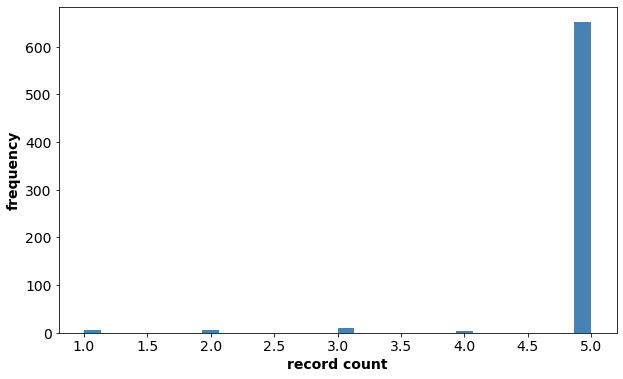

In [105]:
#Tickers sorted by record counts
df_ctbytick031 = df_sec_yxdata031.loc[:,['ticker','fisc_date_t']].groupby('ticker').count().sort_values(by='fisc_date_t')

#hisotgram
fig01, axes01 = plt.subplots(nrows=1,ncols=1,figsize=(10,6))

df_ctbytick031.loc[:,'fisc_date_t'].plot(ax=axes01,kind='hist',bins=30,color='steelblue')
axes01.set_xlabel('record count', fontsize=14.0, fontweight='bold')
axes01.tick_params(axis='x', labelsize=14)
axes01.set_ylabel('frequency', fontsize=14.0, fontweight='bold') 
axes01.tick_params(axis='y', labelsize=14) 

Revenue, market capitalization plots.

Filter: USD currency, market capitalization and revenue threshholds.

In [106]:
#currency USD, revenue less than cutoff, mkt cap less than cutoff


#????????  more than 1 rpt_ccy

mc_ctff031 = 3*10**12    #$3t
rev_ctff031 = 1.5*10**11        #$300b
is_yx_USDrevmc_fltr031 = ( (df_sec_yxdata031.loc[:,'rpt_ccy'] == 'USD') & 
    (df_sec_yxdata031.loc[:,'mktcap_sec_tp1'] <= mc_ctff031) & (df_sec_yxdata031.loc[:,'rev'] <= rev_ctff031) )

Revenue histogram.

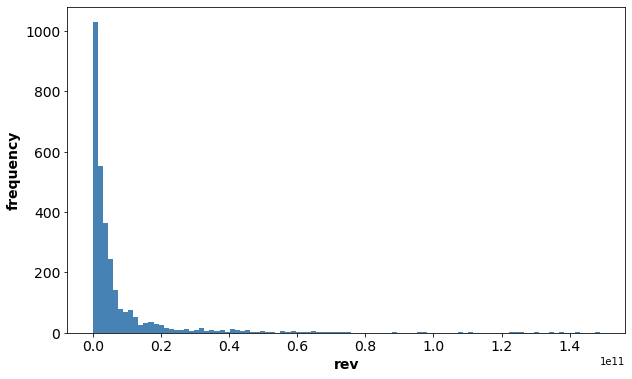

In [107]:
#hisotgram
fig02, axes02 = plt.subplots(nrows=1,ncols=1,figsize=(10,6))

df_sec_yxdata031.loc[is_yx_USDrevmc_fltr031,'rev'].plot(ax=axes02,kind='hist',bins=100,
    color='steelblue')
axes02.set_xlabel('rev', fontsize=14.0, fontweight='bold')
axes02.tick_params(axis='x', labelsize=14)
axes02.set_ylabel('frequency', fontsize=14.0, fontweight='bold') 
axes02.tick_params(axis='y', labelsize=14) 

Scatterplot of target, market capitalization (mktcap_sec_tp1), versus revenue (rev), filtering on USD currency.

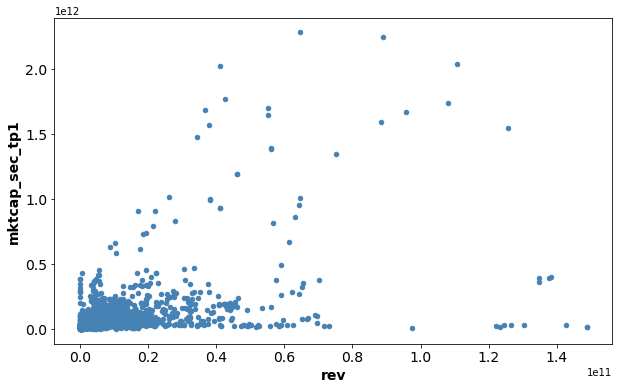

In [108]:
#scatter: mktcap_sec_tp1 vs rev
fig03, axes03 = plt.subplots(nrows=1,ncols=1,figsize=(10,6))

df_sec_yxdata031.loc[is_yx_USDrevmc_fltr031,:].plot(x='rev',y='mktcap_sec_tp1',kind='scatter',
    ax=axes03,color='steelblue')
axes03.set_xlabel('rev', fontsize=14.0, fontweight='bold')
axes03.tick_params(axis='x', labelsize=14)
axes03.set_ylabel('mktcap_sec_tp1', fontsize=14.0, fontweight='bold') 
axes03.tick_params(axis='y', labelsize=14) 

In [114]:
df_sec_yxdata031.loc[is_yx_USDrevmc_fltr031,lst_yxdata_met031].sort_values(by='mktcap_sec_tp1',ascending=False).head(20)

,ticker,rpt_ccy,mktcap_sec_tp1,clsadj_etf_t,rev,rev_yoy,rev_yoy_qdq,gp,gp_c,gp_mgn,...,ni_mgn,ni_mgn_ydy,sh_iss,sh_rprch,div,div_ydy,cf_op,cf_op_ydy,cf_op_mgn,cf_op_mgn_ydy
2,AAPL,USD,2.278942e+12,167.704415,6.469800e+10,0.010275,-0.103905,2.468900e+10,2.468900e+10,0.381604,...,0.195879,-0.017831,450000000.0,1.718700e+10,3.511000e+09,32000000.0,2.057600e+10,6.660000e+08,0.318031,0.007132
0,AAPL,USD,2.245600e+12,204.231930,8.891400e+10,0.544826,0.327687,3.807900e+10,3.807900e+10,0.428268,...,0.265762,0.070318,561000000.0,1.854800e+10,3.447000e+09,72000000.0,2.398100e+10,1.067000e+10,0.269710,0.038440
1,AAPL,USD,2.035667e+12,191.404873,1.108010e+11,0.217139,0.206864,4.432800e+10,4.432800e+10,0.400069,...,0.259519,0.015259,0.0,2.477500e+10,3.613000e+09,74000000.0,3.876300e+10,8.247000e+09,0.349843,0.014628
5,MSFT,USD,2.020644e+12,204.231930,4.105900e+10,0.196532,0.024846,2.866100e+10,2.866100e+10,0.698044,...,0.376458,0.063126,396000000.0,6.930000e+09,4.221000e+09,345000000.0,2.217900e+10,4.675000e+09,0.540174,0.030076
6,MSFT,USD,1.767637e+12,191.404873,4.255800e+10,0.171687,0.039208,2.888200e+10,2.888200e+10,0.678650,...,0.363339,0.042625,302000000.0,6.535000e+09,4.230000e+09,344000000.0,1.251600e+10,1.836000e+09,0.294093,0.000056
20,AMZN,USD,1.735721e+12,204.231930,1.080880e+11,0.440213,0.004265,3.503500e+10,4.568500e+10,0.422665,...,0.075004,0.041226,0.0,0.000000e+00,0.000000e+00,0.0,4.213000e+09,1.149000e+09,0.038977,-0.001849
15,GOOG,USD,1.702156e+12,204.231930,5.531400e+10,0.343910,0.112415,3.121100e+10,3.121100e+10,0.564251,...,0.324149,0.158062,0.0,1.139500e+10,0.000000e+00,0.0,1.928900e+10,7.838000e+09,0.348718,0.070504
7,MSFT,USD,1.684459e+12,167.704415,3.672400e+10,0.132478,0.004471,2.615200e+10,2.615200e+10,0.712123,...,0.378308,0.049025,545000000.0,6.743000e+09,3.856000e+09,346000000.0,1.933500e+10,5.517000e+09,0.526495,0.100382
22,AMZN,USD,1.667644e+12,167.704415,9.571700e+10,0.375541,-0.028896,2.930900e+10,3.861100e+10,0.403387,...,0.066143,0.035475,0.0,0.000000e+00,0.000000e+00,0.0,1.196400e+10,4.072000e+09,0.124993,0.011578
10,GOOGL,USD,1.644663e+12,204.231930,5.531400e+10,0.343910,0.112415,3.121100e+10,3.121100e+10,0.564251,...,0.324149,0.158062,0.0,1.139500e+10,0.000000e+00,0.0,1.928900e+10,7.838000e+09,0.348718,0.070504


In [113]:
df_sec_yxdata031.loc[is_yx_USDrevmc_fltr031,lst_yxdata_met031].sort_values(by='rev',ascending=False).head(20)

,ticker,rpt_ccy,mktcap_sec_tp1,clsadj_etf_t,rev,rev_yoy,rev_yoy_qdq,gp,gp_c,gp_mgn,...,ni_mgn,ni_mgn_ydy,sh_iss,sh_rprch,div,div_ydy,cf_op,cf_op_ydy,cf_op_mgn,cf_op_mgn_ydy
3282,ASX,USD,1.577998e+10,191.404873,1.488770e+11,0.283168,0.235208,2.329900e+10,2.329900e+10,0.156498,...,0.067465,0.012450,0.0,0.000000e+00,1.800000e+04,-1.200000e+04,2.812200e+10,-3.461000e+09,0.188894,-0.083319
3281,ASX,USD,1.715215e+10,204.231930,1.488770e+11,0.529186,0.246018,2.329900e+10,2.329900e+10,0.156498,...,0.067465,0.027417,0.0,0.000000e+00,1.800000e+04,-8.520822e+09,2.812200e+10,1.467400e+10,0.188894,0.050763
1757,MFG,USD,3.081302e+10,124.161475,1.427100e+11,NaN,NaN,0.000000e+00,1.427100e+11,1.000000,...,-1.778208,NaN,0.0,0.000000e+00,0.000000e+00,-1.904130e+11,0.000000e+00,-6.610190e+11,0.000000,NaN
80,WMT,USD,3.989336e+11,216.525599,1.383100e+11,0.027395,-0.046071,3.503800e+10,3.503800e+10,0.253329,...,0.019738,-0.009900,0.0,2.809000e+09,1.549000e+09,2.000000e+07,2.858000e+09,-4.159000e+09,0.020664,-0.031460
83,WMT,USD,3.901737e+11,162.176051,1.377420e+11,0.056490,-0.029828,3.505300e+10,3.505300e+10,0.254483,...,0.047015,0.019327,0.0,0.000000e+00,1.529000e+09,1.300000e+07,1.193900e+10,4.317000e+09,0.086677,0.028215
82,WMT,USD,3.933407e+11,166.510684,1.347080e+11,0.052480,-0.004010,3.436900e+10,3.436900e+10,0.255137,...,0.038119,0.012430,0.0,4.630000e+08,1.524000e+09,1.500000e+07,3.924000e+09,5.700000e+08,0.029130,0.002925
84,WMT,USD,3.628207e+11,140.555916,1.346220e+11,0.086318,0.065582,3.259600e+10,3.259600e+10,0.242130,...,0.029639,-0.001364,0.0,7.230000e+08,1.529000e+09,9.000000e+06,7.017000e+09,3.454000e+09,0.052124,0.023372
2015,FMX,USD,2.714485e+10,191.404873,1.303290e+11,-0.016541,0.013883,5.201700e+10,5.201700e+10,0.399121,...,-0.009553,-0.045796,0.0,0.000000e+00,1.586800e+10,2.239107e+09,1.989707e+10,7.271432e+09,0.152668,0.057395
2016,FMX,USD,2.687489e+10,167.704415,1.265006e+11,-0.030424,-0.001433,4.853561e+10,4.853561e+10,0.383679,...,0.025476,-0.030276,0.0,0.000000e+00,7.955000e+09,1.138087e+09,1.469535e+10,-3.435307e+10,0.116168,-0.259768
21,AMZN,USD,1.547092e+12,191.404873,1.255550e+11,0.435948,0.060407,1.255550e+11,1.255550e+11,1.000000,...,0.057521,0.020145,0.0,0.000000e+00,0.000000e+00,0.000000e+00,3.043100e+10,1.077200e+10,0.242372,0.017536


Save target, feature data. Reload if needed.

In [ ]:
#save target, feature data: df_sec_yxdata031
data_elmt0311 = 'yxdata'

#json
filnm0311 = '../data/sec_' + data_elmt0311 + '_' + statusdate01.strftime('%Y%m%d') + '.json'

df_sec_res_0311 = df_sec_yxdata031.copy()

#dates to strings
lst_yxdata_dates031 = ['rpt_date_t', 'rpt_date_tp1', 'fisc_date_t', 'fisc_date_tp1', 'meas_date_t', 'meas_date_tp1', 
    'fisc_date_tm1', 'fisc_date_tm4', 'fisc_date_tm5']

for lst_date_itm031 in lst_yxdata_dates031:
    df_sec_res_0311.loc[:,lst_date_itm031] = df_sec_res_0311.loc[:,lst_date_itm031].dt.strftime('%Y-%m-%d')

#df_sec_res_031.to_json(filnm0311)

In [ ]:
#load target, feature data: df_sec_yxdata031
data_elmt0312 = 'yxdata'

#json - df_sec_res
filnm0312 = '../data/sec_' + data_elmt0312 + '_' + statusdate01.strftime('%Y%m%d') + '.json'

with open(filnm0312) as f0312:
    sec_res_dict0312 = json.load(f0312)
        
df_sec_yxdata_load031 = pd.DataFrame.from_dict(sec_res_dict0312)

for lst_date_itm031 in lst_yxdata_dates031:
    df_sec_yxdata_load031.loc[:,lst_date_itm031] = pd.to_datetime(df_sec_yxdata_load031.loc[:,lst_date_itm031])
    
del f0312, sec_res_dict0312
#df_sec_yxdata_load031

## 4 Conclusions

The key results of this data wrangling notebook are:
<ol type="1">
  <li>abc</li>
  <li>abc</li>
  <li>abc</li>
  <li>the standardized target, feature data is stored in JSON format to facilitate downstream analyses</li>
</ol> 


In [ ]:
###########   NOTES  ##### 


#df_sec_balsht021.columns
#df_sec_incstmt022.columns
#df_sec_cshflw023.columns
df_sec_meta031.columns


#'Symbol', 'fiscalDateEnding', 'reportedCurrency',
    #'cashAndCashEquivalentsAtCarryingValue', 'cashAndShortTermInvestments', 'deferredRevenue',
    #'capitalLeaseObligations', 'longTermDebt',
    #'commonStockSharesOutstanding', 
    #'etl_timestamp'
#'Symbol', 'fiscalDateEnding', 'reportedCurrency', 
    #'totalRevenue','costofGoodsAndServicesSold', 'costOfRevenue', 'grossProfit',
    #'operatingExpenses', 'operatingIncome', 'incomeBeforeTax',
    #'depreciationAndAmortization', 'ebitda', 'netIncome', 
    #'etl_timestamp'
#'Symbol', 'fiscalDateEnding', 'reportedCurrency',
    #'proceedsFromIssuanceOfCommonStock', 'paymentsForRepurchaseOfCommonStock', 'capitalExpenditures',
    #'dividendPayoutCommonStock', 
    #'operatingCashflow', 'cashflowFromInvestment', 'cashflowFromFinancing', 'changeInCashAndCashEquivalents',
    #'etl_timestamp'
#'ticker', 'mkt_cap_202109', 'rpt_seq', 'rpt_yr', 'rpt_date_t',
    #'rpt_date_tp1', 'fisc_date_t', 'fisc_date_tp1', 'meas_date_t',
    #'meas_date_tp1', 'rd_t_estflg', 'rd_tp1_estflg'


#'APPL','MSFT','CRWD','OLED','SPT','MGNI','FLGT'
is_symb_chk021 = df_sec_balsht021.loc[:,'Symbol'].isin(['AAPL','MSFT','CRWD','OLED','SPT','MGNI','FLGT'])
df_sec_balsht021.loc[is_symb_chk021,:].head(20)


fig021, axes021 = plt.subplots(nrows=2,ncols=3,figsize=(10,10))
fig021.subplots_adjust(hspace=0.50)

axes_flt021 = axes021.flatten()
for i021 in range(0,len(lst_num021)-1):
    col_nm021 = lst_num021[i021]
    ax021 = axes_flt021[i021]
    
    #histogram plot
    df_sec_balsht021.loc[:,col_nm021].plot(ax=ax021,kind='hist',bins=30,color='steelblue')
    ax021.set_xlabel(col_nm021, fontsize=14.0, fontweight='bold')
    ax021.tick_params(axis='x', labelsize=14)
    ax021.set_ylabel('frequency', fontsize=14.0, fontweight='bold') 
    ax021.tick_params(axis='y', labelsize=14) 
    #axes02[i][1].axvline(stats_lndif01[i][1], color='r', linestyle='dashed', linewidth=3)